In [2]:
import pandas as pd

# read data
df = pd.read_csv('data/multiTimeline.csv')
df

,Month,Interest
0,2004-01,0
1,2004-02,4
2,2004-03,3
3,2004-04,3
4,2004-05,1
...,...,...
225,2022-10,90
226,2022-11,93
227,2022-12,75
228,2023-01,81


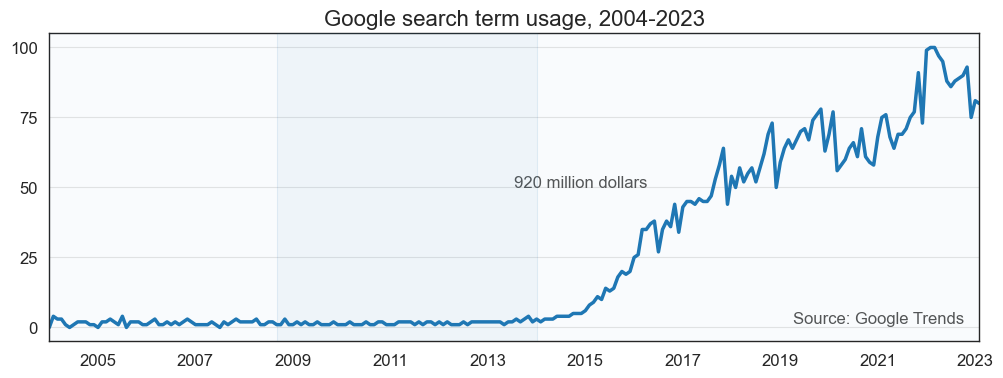

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='white', context='paper', rc={'figure.figsize':(12, 4)})

# plot a time series with Interest as the y-axis and x-axis in years
df.plot(x='Month', y='Interest', color='tab:blue', linewidth=2.5, zorder=1)

# add source annotation in bottom right corner
plt.annotate('Source: Google Trends', xy=(0.8, 0.06), xycoords='axes fraction', fontsize=12, color='#555555', zorder=2)

# add source annotation in bottom right corner
plt.annotate('920 million dollars', xy=(0.5, 0.5), xycoords='axes fraction', fontsize=12, color='#555555')

# shade the plot post-GFC in red, and make it behind the plot
plt.axvspan('2004-01-01', '2008-09-01', color='tab:blue', alpha=0.025, zorder=3)

# shade the plot post-GFC in red, and make it behind the plot
plt.axvspan('2008-09-01', '2014-01-01', color='tab:blue', alpha=0.075, zorder=3)

# shade the plot post-GFC in red, and make it behind the plot
plt.axvspan('2014-01-01', '2023-02-01', color='tab:blue', alpha=0.025, zorder=3)


plt.xlabel('')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.yticks(np.arange(0, 110, 25), fontsize=12)
plt.xticks(fontsize=12)

plt.title('Google search term usage, 2004-2023', fontsize=16)
plt.legend().remove()
plt.show()

# Numbers represent search interest relative to the highest point on the chart for the given region and time. 
# A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. 
# A score of 0 means that there was not enough data for this term."

<AxesSubplot: xlabel='Month'>

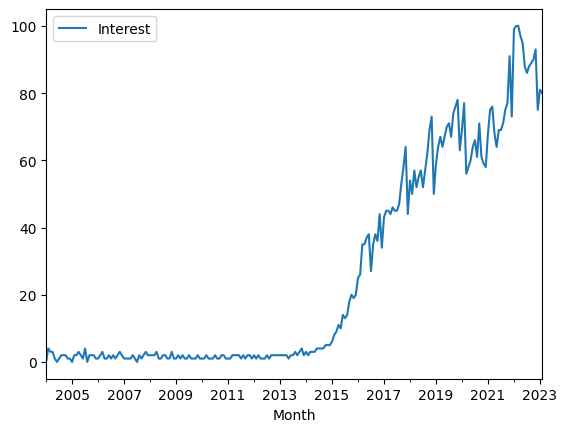

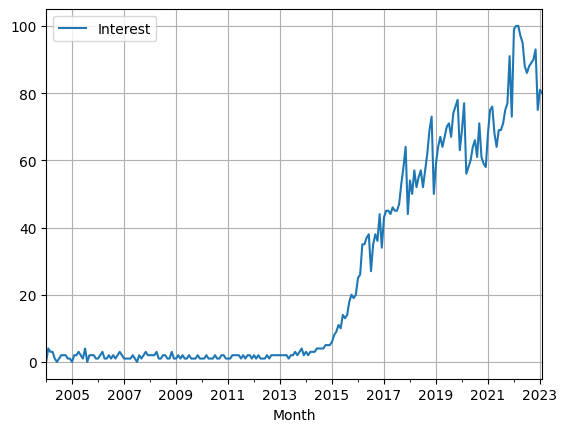

In [7]:
# plot a time series with Interest as the y-axis and x-axis in years
df['Month'] = pd.to_datetime(df['Month'])
df.plot(x='Month', y='Interest')

# add y-axis grid
df.plot(x='Month', y='Interest', grid=True)

### IMDB data

In [546]:
import pandas as pd

# read data file with .tsv extension
daao_df = pd.read_csv('data/daao_biography_level_202202211719.csv')


/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_2626/81878566.py:4: DtypeWarning: Columns (1,2,3,4,5,7,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,46,47,48,50,51,52,53,55,56,57,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,82,83,84,85,87,88,89,90,91,92,94,95,97,98,99,100,103,104,105,106,107,108,109,111,112,113,114,115,116,117,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,160,161,162,163,164,165,166,168,169,170,171,172,174,175,177,178,179,180,181,182,183,185,186,187,188,189,191,192,194,195,196,197,198,199,200,202,203,204,206,207,208,209,210,211,213,214,215,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,263,264,265,267,268,269,270,271,272,273,274,275,276,277,278,280,281,282,283,284,285,286,287,288,289,290,291,29

In [ ]:
daao_df[''].nunique()

In [538]:
import pandas as pd

# read data file with .tsv extension
imdb_df = pd.read_csv('data/name.basics.tsv', sep='\t')

# fix UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 1: invalid continuation byte
acde_df = pd.read_csv('data/dataviz_position_task_dataset.csv', encoding='latin-1')

In [14]:
imdb_df.columns

Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')

In [26]:
x = 'Chris Edwards'

# get the first name
x.split(' ')[0]

# get the last name
x.split(' ')[-1]

len(x.split(' '))

2

In [40]:
x.strip().replace('  ',' ')

'Bill Onus'

In [12]:
for x,y in zip(acde_df['display_name_ausstage'], acde_df['same_name']):
    

In [68]:
count = 0

for x,y in zip(acde_df['display_name_ausstage'], acde_df['same_name']):
    if count % 20 == 0: print(count)
    count += 1
    x = x.strip().replace('  ',' ')
    y = y.strip().replace('  ',' ')

    if (len(x.split(' ')) == 2) | (len(y.split(' ')) == 2):
        count += 1
        try: 
            this_person = imdb_df[(imdb_df['primaryName'].str.contains(x.split(' ')[0],na=False)) & \
            (imdb_df['primaryName'].str.contains(x.split(' ')[-1],na=False))]
        except:
            this_person = imdb_df[(imdb_df['primaryName'].str.contains(y.split(' ')[0],na=False)) & \
            (imdb_df['primaryName'].str.contains(y.split(' ')[-1],na=False))]
        
        acde_df.loc[acde_df['display_name_ausstage'] == x, 'number_matches'] = this_person.shape[0]
        
    elif (x == 'Tori de Mestre') | (x == 'Ian de Gruchy'):
            this_person = imdb_df[(imdb_df['primaryName'].str.contains(x.split(' ')[0],na=False)) & \
            (imdb_df['primaryName'].str.contains(' '.join(x.split(' ')[-2:]),na=False))]
    elif (x == 'Del Kathryn Barton'):
            this_person = imdb_df[(imdb_df['primaryName'].str.contains(' '.join(x.split(' ')[0:2]))) & \
            (imdb_df['primaryName'].str.contains(x.split(' ')[-1],na=False))]
    elif (x == 'Freddy Jangala Patrick'):
            this_person = imdb_df[(imdb_df['primaryName'].str.contains(x.split(' ')[0],na=False)) & \
            (imdb_df['primaryName'].str.contains(x.split(' ')[1],na=False)) & \
            (imdb_df['primaryName'].str.contains(x.split(' ')[2],na=False))]
    else:
        print(x,y)
        pass

0
20
40
60
80
100
120
140
160
180
200
220
240
380
400
420
440
460
480
700
720
740
760
780


In [70]:
# write to csv
acde_df.to_csv('data/ausstage_march_symp.csv', index=False)

In [69]:
p

(401, 26)

In [14]:
imdb_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0045537,tt0072308,tt0053137,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0037382,tt0038355,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0049189,tt0054452,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0080455,tt0078723,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0083922,tt0060827"
...,...,...,...,...,...,...
12319802,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt11657662,tt14069590"
12319803,nm9993716,Essias Loberg,\N,\N,NaN,\N
12319804,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
12319805,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [329]:
exact_matches = pd.DataFrame()

# acde_df = df.copy() - ivy's version

for idx,x in enumerate(acde_df['display_name_ausstage'].unique()):
    if idx % 25 == 0: print(idx)
    x2 = x.strip().replace('  ',' ')
    this_person = imdb_df[imdb_df['primaryName'] == x2].copy()
    if this_person.shape[0] == 1: 
        this_person['display_name_ausstage'] = x 
        exact_matches = pd.concat([exact_matches, this_person], axis=0)

    # acde_df.loc[acde_df['display_name_ausstage'] == x, 'exact_matches'] = this_person.shape[0]
    # acde_df.loc[acde_df['display_name_ausstage'] == x, 'exact_matches_nos'] = ','.join(this_person['nconst'].unique())

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375


In [330]:
pd.merge(acde_df, exact_matches, on='display_name_ausstage')

,same_name,display_name_ausstage,first_name_ausstage,first_name_daao,middle_name_ausstage,last_name_ausstage,last_name_daao,gender_ausstage,gender_daao,year_of_birth_ausstage,...,all_names_unf_ausstage,ori_id_ausstage,ori_id_daao,ori_id_unf_ausstage,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,Les Tanner,Les Tanner,Les,Les,None,Tanner,Tanner,Male,Male,NaN,...,"[Les Tanner, Pseud: Michael King]","{'original_id': '243158', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",16319,nm4275620,Les Tanner,\N,\N,"art_department,miscellaneous",tt1822376
1,Max Dupain,Max Dupain,Max,Max,None,Dupain,Dupain,Male,Male,1911.0,...,[Max Dupain],"{'original_id': '436343', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",57570,nm1865019,Max Dupain,\N,\N,camera_department,\N
2,Maria Kozic,Maria Kozic,Maria,Maria,None,Kozic,Kozic,Female,Female,NaN,...,[Maria Kozic],"{'original_id': '255225', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",34444,nm0468857,Maria Kozic,\N,\N,"actress,soundtrack,art_director","tt0271157,tt4978482,tt0445039,tt0106450"
3,Destiny Deacon,Destiny Deacon,Destiny,Destiny,None,Deacon,Deacon,Female,Female,NaN,...,"[ Destiny Deacon , Destiny Deacon]","{'original_id': '462023', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",93089,nm9716539,Destiny Deacon,\N,\N,"director,actress,writer",\N
4,Rosemary Laing,Rosemary Laing,Rosemary,Rosemary,None,Laing,Laing,Female,Female,NaN,...,[Rosemary Laing],"{'original_id': '513847', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",138309,nm8787163,Rosemary Laing,\N,\N,NaN,"tt1782248,tt7225594"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Albie Thoms,Albie Thoms,Albie,Albie,None,Thoms,Thoms,Male,Male,NaN,...,"[Geoffrey Thoms; Albie, Albie Thoms]","{'original_id': '418125', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",51566,nm0860864,Albie Thoms,1941,2012,"director,producer,editor","tt1798114,tt0079693,tt0867597,tt1765904"
105,Robert Bolton,Robert Bolton,Robert,Robert,None,Bolton,Bolton,Male,Male,NaN,...,[Robert Bolton],"{'original_id': '228792', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",9034,nm6625703,Robert Bolton,\N,\N,"actor,writer,composer","tt3875448,tt3746662,tt15010528,tt3857940"
106,Russell Drysdale,Russell Drysdale,Russell,Russell,None,Drysdale,Drysdale,Male,Male,1912.0,...,[Russell Drysdale],"{'original_id': '436394', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",59583,nm4217771,Russell Drysdale,1912,1981,"writer,art_department","tt14392544,tt1793275,tt2337189,tt6547248"
107,Daniel Askill,Daniel Askill,Daniel,Daniel,None,Askill,Askill,Male,Male,NaN,...,[Daniel Askill],"{'original_id': '440151', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",1713,nm1747324,Daniel Askill,\N,\N,"director,writer,producer","tt0430755,tt10513980,tt11512720"


In [331]:
acde_imdb_merged = pd.merge(acde_df, exact_matches, on='display_name_ausstage')
print(acde_imdb_merged['display_name_ausstage'].nunique())
print(acde_imdb_merged['gender_daao'].value_counts(),'\n\n', acde_imdb_merged['gender_ausstage'].value_counts())

# write to csv
# acde_imdb_merged.to_csv('data/ausstage_march_symp_exact.csv', index=False)

109
Male      68
Female    41
Name: gender_daao, dtype: int64 

 Male       64
Female     43
Unknown     2
Name: gender_ausstage, dtype: int64


In [332]:
# Anomalies identified with gender records

# remove Pat Oliphant - appears to be two different people
acde_imdb_merged = acde_imdb_merged[acde_imdb_merged['display_name_ausstage'] != 'Pat Oliphant']

# update Toni Maticevski - same person but listed as female in AusStage?
acde_imdb_merged.loc[acde_imdb_merged['display_name_ausstage'] == 'Toni Maticevski','gender_ausstage'] = 'Male'

# update Brook Andrew - same person but listed as female in AusStage?
acde_imdb_merged.loc[acde_imdb_merged['display_name_ausstage'] == 'Brook Andrew','gender_ausstage'] = 'Male'

# update Bonita Ely - listed as Unknown in AusStage
acde_imdb_merged.loc[acde_imdb_merged['display_name_ausstage'] == 'Bonita Ely','gender_ausstage'] = 'Female'

# update J. Wright - listed as Unknown in AusStage
acde_imdb_merged.loc[acde_imdb_merged['display_name_ausstage'] == 'J. Wright','gender_ausstage'] = 'Male'

# we identified some mismatches - these are not the same person
nonmatches_names = ['Raymond Arnold','Janet Dawson','Syd Miller','Eileen Cook', 'Lauren Berkowitz']
acde_imdb_merged = acde_imdb_merged[~acde_imdb_merged['display_name_ausstage']\
                                              .isin(nonmatches_names)]

# we omit rows with no record knownForTitles data
acde_imdb_merged = acde_imdb_merged[acde_imdb_merged['knownForTitles'] != '\\N']
print(acde_imdb_merged['gender_daao'].value_counts(),'\n\n', acde_imdb_merged['gender_ausstage'].value_counts())

acde_imdb_merged.shape

Male      58
Female    29
Name: gender_daao, dtype: int64 

 Male      58
Female    29
Name: gender_ausstage, dtype: int64


(87, 31)

In [333]:
acde_imdb_merged['knownForTitles']

acde_imdb_expanded = acde_imdb_merged.assign(titleId=acde_imdb_merged['knownForTitles']\
    .str.split(',')).explode('titleId').reset_index(drop=True)

# keep only rows with more than 2 occurrences
acde_imdb_expanded[acde_imdb_expanded['titleId'].isin(acde_imdb_expanded['titleId'].value_counts()[acde_imdb_expanded['titleId'].value_counts() > 1].index)]
# acde_imdb_expanded.display_name_ausstage.value_counts().reset_index()

,same_name,display_name_ausstage,first_name_ausstage,first_name_daao,middle_name_ausstage,last_name_ausstage,last_name_daao,gender_ausstage,gender_daao,year_of_birth_ausstage,...,ori_id_ausstage,ori_id_daao,ori_id_unf_ausstage,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,titleId
13,Bronwyn Bancroft,Bronwyn Bancroft,Bronwyn,Bronwyn,None,Bancroft,Bancroft,Female,Female,NaN,...,"{'original_id': '243712', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",39879,nm11338369,Bronwyn Bancroft,\N,\N,NaN,tt0143055,tt0143055
18,Jeffrey Smart,Jeffrey Smart,Jeffrey,Jeffrey,None,Smart,Smart,Male,Male,NaN,...,"{'original_id': '228779', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",9021,nm7045275,Jeffrey Smart,\N,\N,NaN,"tt4343716,tt5233498",tt4343716
47,Desmonde Downing,Desmonde Downing,Desmonde,Desmonde,None,Downing,Downing,Female,Female,1920.0,...,"{'original_id': '228546', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",10641,nm1257013,Desmonde Downing,\N,\N,"production_designer,art_department","tt0069862,tt0047189,tt0159850,tt0377159",tt0069862
64,Arthur Boyd,Arthur Boyd,Arthur,Arthur,None,Boyd,Boyd,Male,Male,NaN,...,"{'original_id': '245462', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",37053,nm4110324,Arthur Boyd,1920,1999,producer,"tt0077082,tt0244268,tt6547248,tt1737097",tt6547248
96,Cul Cullen,Cul Cullen,Cul,Fred,None,Cullen,Cullen,Male,Male,NaN,...,"{'original_id': '488908', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",116970,nm0191454,Cul Cullen,1934,1982,"actor,writer","tt0196279,tt0084296,tt0067408,tt0129685",tt0129685
105,Albert Tucker,Albert Tucker,Albert,Albert,None,Tucker,Tucker,Male,Male,NaN,...,"{'original_id': '227289', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",9579,nm1387750,Albert Tucker,\N,\N,art_department,"tt1792630,tt4343716",tt4343716
142,Quentin Hole,Quentin Hole,Quentin,Quentin,None,Hole,Hole,Male,Male,NaN,...,"{'original_id': '229830', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",11948,nm0390419,Quentin Hole,\N,\N,"production_designer,art_department,art_director","tt0425716,tt0077999,tt0069862,tt0086676",tt0069862
151,Betty Dyson,Betty Dyson,Betty,Betty,None,Dyson,Dyson,Female,Female,NaN,...,"{'original_id': '228914', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",10390,nm0246018,Betty Dyson,\N,\N,actress,"tt0068114,tt0386011,tt0129685,tt0083792",tt0129685
162,Norman Hetherington,Norman Hetherington,Norman,Norman,None,Hetherington,Hetherington,Male,Male,1921.0,...,"{'original_id': '444889', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",82680,nm1665194,Norman Hetherington,1921,2010,"actor,miscellaneous","tt0060025,tt0285751,tt0407361,tt0143055",tt0407361
163,Norman Hetherington,Norman Hetherington,Norman,Norman,None,Hetherington,Hetherington,Male,Male,1921.0,...,"{'original_id': '444889', 'original_id_unf_als...","{'birth': {'note': '', 'coverage': {'date': '1...",82680,nm1665194,Norman Hetherington,1921,2010,"actor,miscellaneous","tt0060025,tt0285751,tt0407361,tt0143055",tt0143055


In [223]:
acde_imdb_expanded.display_name_ausstage.value_counts().reset_index().head(31)
acde_imdb_expanded.display_name_ausstage.value_counts().mean()
acde_imdb_expanded.display_name_ausstage.value_counts().median()

2.0

In [212]:
acde_imdb_expanded[acde_imdb_expanded.display_name_ausstage == 'Rolf Harris']

,same_name,display_name_ausstage,first_name_ausstage,first_name_daao,middle_name_ausstage,last_name_ausstage,last_name_daao,gender_ausstage,gender_daao,year_of_birth_ausstage,...,ori_id_ausstage,ori_id_daao,ori_id_unf_ausstage,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,titleId
26,Rolf Harris,Rolf Harris,Rolf,Rolf,NaN,Harris,Harris,Male,Male,NaN,...,441506,4da1984cb538b73d9300d23d,80072,nm0365271,Rolf Harris,1930,\N,"soundtrack,actor,music_department","tt1965057,tt0455824,tt2004432,tt3680410",tt1965057
27,Rolf Harris,Rolf Harris,Rolf,Rolf,NaN,Harris,Harris,Male,Male,NaN,...,441506,4da1984cb538b73d9300d23d,80072,nm0365271,Rolf Harris,1930,\N,"soundtrack,actor,music_department","tt1965057,tt0455824,tt2004432,tt3680410",tt0455824
28,Rolf Harris,Rolf Harris,Rolf,Rolf,NaN,Harris,Harris,Male,Male,NaN,...,441506,4da1984cb538b73d9300d23d,80072,nm0365271,Rolf Harris,1930,\N,"soundtrack,actor,music_department","tt1965057,tt0455824,tt2004432,tt3680410",tt2004432
29,Rolf Harris,Rolf Harris,Rolf,Rolf,NaN,Harris,Harris,Male,Male,NaN,...,441506,4da1984cb538b73d9300d23d,80072,nm0365271,Rolf Harris,1930,\N,"soundtrack,actor,music_department","tt1965057,tt0455824,tt2004432,tt3680410",tt3680410


In [102]:
# read data file with .tsv extension
imdb_titleakas_df = pd.read_csv('data/title.akas.tsv', sep='\t')

/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_68372/147457272.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titleakas_df = pd.read_csv('data/title.akas.tsv', sep='\t')


In [334]:
# read data file with .tsv extension
imdb_titlebasics_df = pd.read_csv('data/title.basics.tsv', sep='\t')

/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_68372/2545004822.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titlebasics_df = pd.read_csv('data/title.basics.tsv', sep='\t')


In [335]:
acde_imdb_withtitles = pd.merge(acde_imdb_expanded, imdb_titleakas_df, on='titleId')
acde_imdb_withtitles.head()

,same_name,display_name_ausstage,first_name_ausstage,first_name_daao,middle_name_ausstage,last_name_ausstage,last_name_daao,gender_ausstage,gender_daao,year_of_birth_ausstage,...,primaryProfession,knownForTitles,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,Les Tanner,Les Tanner,Les,Les,None,Tanner,Tanner,Male,Male,NaN,...,"art_department,miscellaneous",tt1822376,tt1822376,1,Words for Freedom,\N,\N,original,\N,1
1,Les Tanner,Les Tanner,Les,Les,None,Tanner,Tanner,Male,Male,NaN,...,"art_department,miscellaneous",tt1822376,tt1822376,2,Words for Freedom,AU,\N,imdbDisplay,\N,0
2,Maria Kozic,Maria Kozic,Maria,Maria,None,Kozic,Kozic,Female,Female,NaN,...,"actress,soundtrack,art_director","tt0271157,tt4978482,tt0445039,tt0106450",tt0271157,1,"Salt, Saliva, Sperm and Sweat",AU,\N,imdbDisplay,\N,0
3,Maria Kozic,Maria Kozic,Maria,Maria,None,Kozic,Kozic,Female,Female,NaN,...,"actress,soundtrack,art_director","tt0271157,tt4978482,tt0445039,tt0106450",tt0271157,2,"Salt, Saliva, Sperm and Sweat",\N,\N,original,\N,1
4,Maria Kozic,Maria Kozic,Maria,Maria,None,Kozic,Kozic,Female,Female,NaN,...,"actress,soundtrack,art_director","tt0271157,tt4978482,tt0445039,tt0106450",tt4978482,1,Under a Stone,\N,\N,original,\N,1


In [197]:
acde_imdb_withtitles2 = pd.merge(acde_imdb_withtitles, imdb_titlebasics_df, 
                                left_on='titleId', right_on='tconst')
acde_imdb_withtitles2.shape

# nonmatches_names = ['Raymond Arnold','Janet Dawson','Syd Miller','Eileen Cook', 'Lauren Berkowitz']
# acde_imdb_withtitles2 = acde_imdb_withtitles2[~acde_imdb_withtitles2['display_name_ausstage']\
#                                               .isin(nonmatches_names)]

(1153, 48)

In [336]:
# acde_imdb_withtitles2['runtimeMinutes'] = acde_imdb_withtitles2['runtimeMinutes'].apply(lambda x: x if x != '\\N' else -1)
# acde_imdb_withtitles2['runtimeMinutes'] = acde_imdb_withtitles2['runtimeMinutes'].astype(int)
movie_cond = (acde_imdb_withtitles2['titleType'] == 'movie')
au_cond = (acde_imdb_withtitles2['region'] == 'AU')
au_movies = acde_imdb_withtitles2[movie_cond & au_cond]['title'].unique()
non_au_movies = acde_imdb_withtitles2[movie_cond & ~au_cond]['title'].unique()
print(len(au_movies), len(non_au_movies))

72 351


In [337]:
acde_imdb_withtitles2.drop_duplicates(['title']).display_name_ausstage.value_counts()

Alan Oldfield       56
Rolf Harris         41
Reg Mombassa        29
Desmonde Downing    25
Sam Jinks           25
                    ..
Harry Wedge          1
Anne Zahalka         1
Simon Kneebone       1
Leigh Hobbs          1
Ruby Collins         1
Name: display_name_ausstage, Length: 87, dtype: int64

In [623]:
acde_imdb_withtitles.columns

Index(['same_name', 'display_name_ausstage', 'first_name_ausstage',
       'first_name_daao', 'middle_name_ausstage', 'last_name_ausstage',
       'last_name_daao', 'gender_ausstage', 'gender_daao',
       'year_of_birth_ausstage', 'year_of_birth_daao',
       'year_of_death_ausstage', 'year_of_death_daao', 'roles_ausstage',
       'roles_daao', 'artist_birth_place_daao', 'nationality_ausstage',
       'other_names_ausstage', 'other_names_daao', 'all_names_daao',
       'all_names_indiv_ausstage', 'all_names_unf_ausstage', 'ori_id_ausstage',
       'ori_id_daao', 'ori_id_unf_ausstage', 'nconst', 'primaryName',
       'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles',
       'titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')

In [628]:
acde_imdb_withtitles[acde_imdb_withtitles.gender_daao=='Female']\
    .sort_values('year_of_birth_daao')['display_name_ausstage'].unique()

array(['Florence Taylor', 'Gwen Sherwood', 'Thelma Thomas', 'Betty Dyson',
       'Mary Durack', 'Marjorie Fisher', 'Margaret Senior',
       'Desmonde Downing', 'Mirka Mora', ' Betty  Churcher ',
       'Vivienne Binns', 'Penny Murphy', 'Prue Acton', 'Lee Whitmore',
       'Ruby Collins', 'Jenny Kee', 'Rosemary Valadon', 'Silvia Jahnsons',
       'Toni Robertson', 'Deborah Vaughan', 'Maria Kozic', 'Anne Zahalka',
       'Bronwyn Bancroft', 'Rosemary Laing', 'Gail Mabo', 'Helen Britton',
       'Del Kathryn Barton', 'Zanny Begg', 'Mandy Ord'], dtype=object)

In [338]:
acde_imdb_withtitles2[acde_imdb_withtitles2.same_name == 'George Gittoes']['tconst'].nunique()

4

In [339]:
acde_imdb_withtitles2[(acde_imdb_withtitles2['title'].isin(international_movies)) &\
                      (acde_imdb_withtitles2['region'].isin(['US']))].head(1).T

,232
same_name,George Gittoes
display_name_ausstage,George Gittoes
first_name_ausstage,George
first_name_daao,George
middle_name_ausstage,NaN
last_name_ausstage,Gittoes
last_name_daao,Gittoes
gender_ausstage,Male
gender_daao,Male
year_of_birth_ausstage,NaN


In [173]:
acde_imdb_withtitles2[acde_imdb_withtitles2['title'] == 'Running on Empty Dreams'].T

,55,56,57,58
same_name,Raymond Arnold,Raymond Arnold,Raymond Arnold,Raymond Arnold
display_name_ausstage,Raymond Arnold,Raymond Arnold,Raymond Arnold,Raymond Arnold
first_name_ausstage,Raymond,Raymond,Raymond,Raymond
first_name_daao,Raymond,Raymond,Raymond,Raymond
middle_name_ausstage,NaN,NaN,NaN,NaN
last_name_ausstage,Arnold,Arnold,Arnold,Arnold
last_name_daao,Arnold,Arnold,Arnold,Arnold
gender_ausstage,Male,Male,Male,Male
gender_daao,Male,Male,Male,Male
year_of_birth_ausstage,1950.0,1950.0,1950.0,1950.0


In [180]:
# get list difference of two lists
international_movies = list(set(non_au_movies) - set(au_movies))
acde_imdb_withtitles2[acde_imdb_withtitles2['title'].isin(international_movies)]['region'].value_counts()

\N      29
US      24
GB      24
BR      22
RU      20
GR      19
FR      14
JP      13
ES      13
CA      13
PL      13
FI      12
DE      11
IT      11
HU      11
PT      11
BG      10
TR       9
RO       6
SE       6
AR       6
XWG      5
BE       5
XWW      5
UA       4
SUHH     4
MX       4
DK       4
RS       4
NO       3
IR       2
KR       2
AT       2
HR       2
CO       2
TW       2
LV       2
CZ       2
SI       1
HK       1
VN       1
NL       1
EE       1
LT       1
PE       1
ZA       1
SK       1
SG       1
XYU      1
UY       1
Name: region, dtype: int64

In [ ]:
acde_imdb_withtitles2['title']

In [131]:
acde_imdb_withtitles[(acde_imdb_withtitles['language'] != '\\N')]['title'].value_counts()

The Twelve                     14
Blaze                          12
Mirka                           7
Australia                       6
Wolf Creek 2                    5
                               ..
Дългият Джон Силвър             1
Long John Silver                1
Les pirates des mers du Sud     1
De schat van de zeerover        1
De roep van het leven           1
Name: title, Length: 118, dtype: int64

In [130]:
acde_imdb_withtitles[(acde_imdb_withtitles['title'] == 'The Twelve')]

,same_name,display_name_ausstage,first_name_ausstage,first_name_daao,middle_name_ausstage,last_name_ausstage,last_name_daao,gender_ausstage,gender_daao,year_of_birth_ausstage,...,primaryProfession,knownForTitles,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
407,Anne Zahalka,Anne Zahalka,Anne,Anne,NaN,Zahalka,Zahalka,Female,Female,NaN,...,art_department,tt13589004,tt13589004,10,The Twelve,CA,en,imdbDisplay,\N,0
408,Anne Zahalka,Anne Zahalka,Anne,Anne,NaN,Zahalka,Zahalka,Female,Female,NaN,...,art_department,tt13589004,tt13589004,11,The Twelve,TW,\N,imdbDisplay,\N,0
409,Anne Zahalka,Anne Zahalka,Anne,Anne,NaN,Zahalka,Zahalka,Female,Female,NaN,...,art_department,tt13589004,tt13589004,12,The Twelve,AE,\N,imdbDisplay,\N,0
410,Anne Zahalka,Anne Zahalka,Anne,Anne,NaN,Zahalka,Zahalka,Female,Female,NaN,...,art_department,tt13589004,tt13589004,13,The Twelve,ES,\N,imdbDisplay,\N,0
411,Anne Zahalka,Anne Zahalka,Anne,Anne,NaN,Zahalka,Zahalka,Female,Female,NaN,...,art_department,tt13589004,tt13589004,14,The Twelve,HK,en,imdbDisplay,\N,0
412,Anne Zahalka,Anne Zahalka,Anne,Anne,NaN,Zahalka,Zahalka,Female,Female,NaN,...,art_department,tt13589004,tt13589004,15,The Twelve,\N,\N,original,\N,1
413,Anne Zahalka,Anne Zahalka,Anne,Anne,NaN,Zahalka,Zahalka,Female,Female,NaN,...,art_department,tt13589004,tt13589004,16,The Twelve,AU,\N,imdbDisplay,\N,0
414,Anne Zahalka,Anne Zahalka,Anne,Anne,NaN,Zahalka,Zahalka,Female,Female,NaN,...,art_department,tt13589004,tt13589004,17,The Twelve,NL,\N,imdbDisplay,\N,0
415,Anne Zahalka,Anne Zahalka,Anne,Anne,NaN,Zahalka,Zahalka,Female,Female,NaN,...,art_department,tt13589004,tt13589004,18,The Twelve,GB,\N,imdbDisplay,\N,0
416,Anne Zahalka,Anne Zahalka,Anne,Anne,NaN,Zahalka,Zahalka,Female,Female,NaN,...,art_department,tt13589004,tt13589004,19,The Twelve,PL,\N,imdbDisplay,\N,0


In [126]:
acde_imdb_withtitles[(acde_imdb_withtitles['region'] != '\\N')]['region'].value_counts()

AU     208
GB     101
US      86
CA      38
DE      33
      ... 
XAS      1
EC       1
SI       1
SK       1
UY       1
Name: region, Length: 64, dtype: int64

Some notes from research


In [ ]:
# imdb scraping steps

# 1. get name and corresponding movies and search for movie by id
# example: https://www.imdb.com/title/tt0203009

# 2. get metadata such as details, awards, 
# rating: title.ratings.tsv.gz
# genre: title.basics.tsv.gz
# region: title.akas.tsv.gz
# language: title.akas.tsv.gz

In [38]:
import pandas as pd

acde_df = pd.read_csv('data/ausstage_march_symp_exact.csv')
acde_df

,same_name,display_name_ausstage,first_name_ausstage,first_name_daao,middle_name_ausstage,last_name_ausstage,last_name_daao,gender_ausstage,gender_daao,year_of_birth_ausstage,...,other_names_ausstage,other_names_daao,all_names_daao,all_names_indiv_ausstage,all_names_unf_ausstage,ori_id_ausstage,ori_id_daao,ori_id_unf_ausstage,exact_matches,exact_matches_nos
0,Les Tanner,Les Tanner,Les,Les,NaN,Tanner,Tanner,Male,Male,NaN,...,['Pseud: Michael King'],"[('Leslie Mervyn', 'Tanner')]","['Les Tanner', 'Leslie Mervyn Tanner']","['Les Tanner', 'Pseud: Michael King']","['Les Tanner', 'Pseud: Michael King']",243158,4da1a7a1b538b73d9301a435,16319,1.0,nm4275620
1,Max Dupain,Max Dupain,Max,Max,NaN,Dupain,Dupain,Male,Male,1911.0,...,[],"[('Maxwell Spencer', 'Dupain')]","['Maxwell Spencer Dupain', 'Max Dupain']",['Max Dupain'],['Max Dupain'],436343,4e9ea85ad707ff2d7b000005,57570,1.0,nm1865019
2,Maria Kozic,Maria Kozic,Maria,Maria,NaN,Kozic,Kozic,Female,Female,NaN,...,[],[],['Maria Kozic'],['Maria Kozic'],['Maria Kozic'],255225,4da19a03b538b73d9300ff9a,34444,1.0,nm0468857
3,Rosemary Laing,Rosemary Laing,Rosemary,Rosemary,NaN,Laing,Laing,Female,Female,NaN,...,[],[],['Rosemary Laing'],['Rosemary Laing'],['Rosemary Laing'],513847,4da19a25b538b73d930101b5,138309,1.0,nm8787163
4,Janet Dawson,Janet Dawson,Janet,Janet,NaN,Dawson,Dawson,Female,Female,NaN,...,['Janet Dawson Boddy'],[],['Janet Dawson'],"['Janet Dawson', 'Janet Dawson Boddy']","['Janet Dawson', 'Janet Dawson Boddy']",225849,4da196beb538b73d9300905c,7971,1.0,nm6441621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Albie Thoms,Albie Thoms,Albie,Albie,NaN,Thoms,Thoms,Male,Male,NaN,...,['Geoffrey Thoms; Albie'],[],['Albie Thoms'],"['Geoffrey Thoms; Albie', 'Albie Thoms']","['Geoffrey Thoms; Albie', 'Albie Thoms']",418125,4e52127dd707ff1dc7008bac,51566,1.0,nm0860864
101,Robert Bolton,Robert Bolton,Robert,Robert,NaN,Bolton,Bolton,Male,Male,NaN,...,[],[],['Robert Bolton'],['Robert Bolton'],['Robert Bolton'],228792,55d54980d707ff3b53000000,9034,1.0,nm6625703
102,Russell Drysdale,Russell Drysdale,Russell,Russell,NaN,Drysdale,Drysdale,Male,Male,1912.0,...,[],"[('George Russell', 'Drysdale'), ('Tas', 'Drys...","['Russell Drysdale', 'George Russell Drysdale'...",['Russell Drysdale'],['Russell Drysdale'],436394,4da196ebb538b73d930099a1,59583,1.0,nm4217771
103,Daniel Askill,Daniel Askill,Daniel,Daniel,NaN,Askill,Askill,Male,Male,NaN,...,[],[],['Daniel Askill'],['Daniel Askill'],['Daniel Askill'],440151,4df8511772edc271750000a3,1713,1.0,nm1747324


In [5]:
# read data file with .tsv extension
imdb_df = pd.read_csv('data/name.basics.tsv', sep='\t')
dr = imdb_df[(imdb_df['primaryName'].str.contains('Dan',na=False)) & (imdb_df['primaryName'].str.contains('Russell',na=False))]

In [10]:
dr

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
707933,nm0751089,Dan Russell,\N,\N,"actor,miscellaneous,casting_director","tt0330788,tt0395947,tt2364322,tt1942683"
707934,nm0751090,Dan Russell,1875,1925,"actor,director,writer","tt0206602,tt0324346,tt0322519,tt0207079"
707935,nm0751091,Dan Russell,\N,\N,transportation_department,tt0120176
707936,nm0751092,Danielle Russell,\N,\N,"make_up_department,producer,director","tt0155776,tt0106175,tt0482461,tt2338454"
1011020,nm10095233,Daniell Russell Thompson,\N,\N,NaN,\N
...,...,...,...,...,...,...
11789202,nm9364088,Dan Russell,\N,\N,NaN,tt5964700
11837835,nm9424643,Dan Russell,\N,\N,actor,tt4278346
12204140,nm9858992,Daniel Russell,\N,\N,special_effects,"tt7949196,tt9103772,tt7615052"
12243411,nm9904381,Daniel Russell,\N,\N,producer,tt8550904


In [9]:
acde_df[acde_df['number_matches'] == acde_df['number_matches'].max()].T

,306
same_name,Dan Russell
display_name_ausstage,Dan
first_name_ausstage,Dan
first_name_daao,Dan
middle_name_ausstage,NaN
last_name_ausstage,Russell
last_name_daao,Russell
gender_ausstage,Male
gender_daao,Male
year_of_birth_ausstage,NaN


In [2]:
acde_df['number_matches'].describe()

count       388.000000
mean        445.242268
std        8225.233545
min           0.000000
25%           0.000000
50%           2.000000
75%          11.000000
max      162026.000000
Name: number_matches, dtype: float64

### New data

In [530]:
# import json file
import json

with open('data/DAAO_AusStage_NameMatching_Details_202302281120.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)

In [531]:
df[df['display_name_ausstage'] == 'George Gittoes'].T

,73
same_name,George Gittoes
display_name_ausstage,George Gittoes
first_name_ausstage,George
first_name_daao,George
middle_name_ausstage,None
last_name_ausstage,Gittoes
last_name_daao,Gittoes
gender_ausstage,Male
gender_daao,Male
year_of_birth_ausstage,NaN


In [535]:
pd.json_normalize(
    pd.json_normalize(
        pd.json_normalize(
        df[df['display_name_ausstage'] == 'George Gittoes']['ori_id_daao']
        )['related_events']
    )[1]
).shape

(1, 14)

In [631]:
df2[df2['node1_value'] == 421214]['node2_value'].unique()

array([141302, 141467, 142260,  73562, 143175, 144543, 145662])

In [323]:
df2[(df2['node1_value'] == 253) & (df2['node2_value'] == 16277)]

,node1_name,node1_value,node2_name,node2_value,relation,link_type
1189609,ORGANISATIONID,253.0,EVENTID,16277,NaN,org_evt


In [317]:
df_bio[df_bio['original_id']==253]

,original_id,original_id_unf_alsokwn,prefix,suffix,display_name,first_name,middle_name,last_name,other_names,gender,...,postcode,email,notes,genderid,countryid,countryname,place_of_birth_id,place_of_death_id,entered_by_user,updated_by_user
1239,253,742,NaN,NaN,Elizabeth Goater,Elizabeth,NaN,Goater,NaN,Female,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [633]:
# df_bio = pd.read_csv('data/AusStage_biography_level_202209211051.csv')
# df2 = pd.read_csv('data/AusStage_network_level_202205122052.csv')

df_bio[df_bio['original_id']\
       .isin(df2[df2['node2_value']\
                 .isin(df2[(df2['node1_value'] == 450108) &\
                           (df2['node1_name'] == 'CONTRIBUTORID')]['node2_value']\
                       .unique())]['node1_value']\
                        .unique())][['display_name']]

,display_name
314,Doug MacLeod
441,Kurt Schwitters
1231,Akira Inoue
1239,Elizabeth Goater
2508,Brooke Stamp
4194,Barbara Wyndon
4890,David Chisholm
5490,David Franzke
6291,Luke George
13961,Katie Noonan


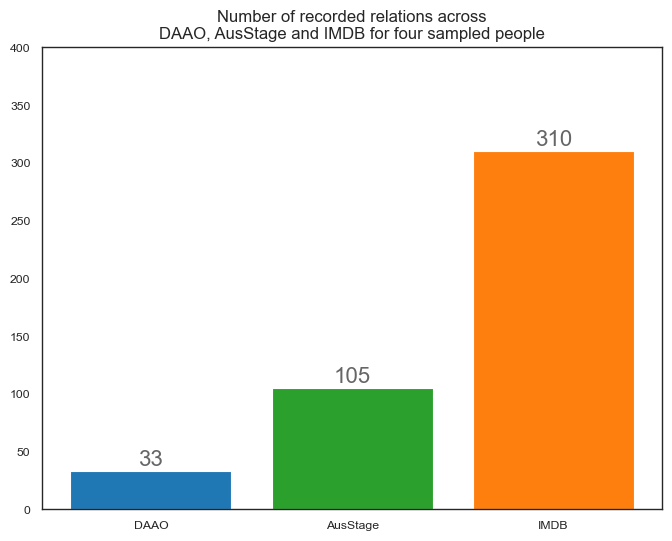

In [7]:
imdb_persons = pd.read_csv('data/imdb_persons.csv',index_col=0)
imdb_persons = imdb_persons.drop_duplicates()

imdb_persons['Dataset'].value_counts()

# generate a bar chart with the values 26, 34 and 100
import matplotlib.pyplot as plt
# set figure size
plt.figure(figsize=(8,6))

plt.bar([1,2,3], [33,105,310], color=['tab:blue','tab:green','tab:orange'])

# add data labels on top of bars
for i, v in enumerate([33,105,310]):
    plt.text(i+1, v+5, str(v), color='black', alpha=0.6, size=16, ha='center')

# change x-axis labels to 'A', 'B' and 'C'
plt.xticks([1,2,3], ['DAAO','AusStage','IMDB'])

plt.title('Number of recorded relations across\nDAAO, AusStage and IMDB for four sampled people', size=12)

# increase y-axis limit to 200
plt.ylim(0,400)

plt.show()

In [543]:
ausstage_persons['display_name'].nunique()

177366

In [8]:
ausstage_persons = pd.read_csv('data/AusStage_biography_level_202209211051.csv',index_col=0)

/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_10166/2017220837.py:1: DtypeWarning: Columns (14,25,26,34) have mixed types. Specify dtype option on import or set low_memory=False.
  ausstage_persons = pd.read_csv('data/AusStage_biography_level_202209211051.csv',index_col=0)


In [476]:
imdb_persons[(imdb_persons['Dataset'] == 'IMDB')]

,Dataset,Relation
Person,,
George Gittoes,IMDB,Bill Kerr
George Gittoes,IMDB,Dudley Shillingsworth
George Gittoes,IMDB,Gabrielle Dalton
George Gittoes,IMDB,Michael Balson
George Gittoes,IMDB,Tim Litchfield
...,...,...
Toni Maticevski,IMDB,Jennifer Fitzpatrick
Toni Maticevski,IMDB,Andrew Lindley
Toni Maticevski,IMDB,Cathie Scott


In [6]:
# #Plot a network graph with 310 participants (in orange) linked to 4 people (in blue) and find 28 people (in green) as an another category
# import networkx as nx
# import matplotlib.pyplot as plt

# # create a graph object
# G = nx.Graph()

# # add nodess
# G.add_nodes_from(list(imdb_persons[(imdb_persons['Dataset'] == 'IMDB')]['Person'].unique()) ,color='tab:blue')

# #plot graph
# nx.draw(G, with_labels=True, node_color='tab:blue', node_size=1000, font_size=16, font_color='white')

In [19]:
imdb_persons = imdb_persons.reset_index()
imdb_persons['SamePerson'] = np.where(imdb_persons['Person'] == imdb_persons['Relation'], 1, 0)

In [26]:
pd.merge(imdb_persons[(imdb_persons['Dataset'] == 'IMDB') &\
                      (imdb_persons['SamePerson']!=1)], 
                      ausstage_persons, 
         left_on='Relation', right_on='display_name', how='inner')[['Person','Relation']]\
            .drop_duplicates().to_csv('data/people63.csv', index=False)



In [25]:
63/310

0.2032258064516129

In [29]:
1-(4/63)

0.9365079365079365

In [269]:
df2 = pd.read_csv('data/AusStage_network_level_202205122052.csv')

/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_68372/3492385025.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('data/AusStage_network_level_202205122052.csv')


In [270]:
df2.columns

Index(['node1_name', 'node1_value', 'node2_name', 'node2_value', 'relation',
       'link_type'],
      dtype='object')

In [284]:
df2[df2['node2_value'].isin(df2[df2['node1_value'] == 234780]['node2_value'].unique())]['node1_value'].unique()

array([7.99000e+02, 8.00200e+03, 2.34780e+05, 2.34781e+05, 1.05200e+03,
       2.55200e+03, 2.32466e+05, 3.80700e+03, 2.55600e+03, 2.30024e+05,
       5.12601e+05, 4.75570e+05, 4.01107e+05, 2.42068e+05, 2.54625e+05,
       5.00635e+05, 2.38126e+05, 5.12602e+05, 2.60023e+05, 4.40191e+05,
       2.14087e+05, 2.49803e+05, 4.88436e+05, 5.15850e+05, 5.15851e+05,
       1.36700e+03, 5.15852e+05, 5.15853e+05, 5.15854e+05, 5.15855e+05,
       2.50052e+05, 2.42756e+05, 5.15856e+05, 5.15857e+05, 7.07100e+04,
       1.62028e+05, 8.95900e+03, 2.53000e+02, 5.12700e+03, 1.11500e+04,
       1.53000e+02])

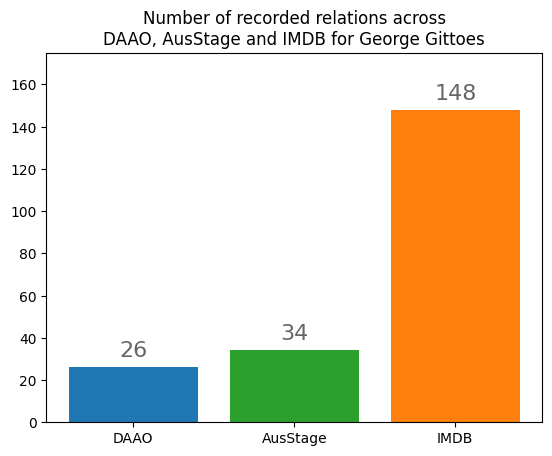

In [2]:
# generate a bar chart with the values 26, 34 and 100
import matplotlib.pyplot as plt
plt.bar([1,2,3], [26,34,148], color=['tab:blue','tab:green','tab:orange'])

# add data labels on top of bars
for i, v in enumerate([26,34,148]):
    plt.text(i+1, v+5, str(v), color='black', alpha=0.6, size=16, ha='center')

# change x-axis labels to 'A', 'B' and 'C'
plt.xticks([1,2,3], ['DAAO','AusStage','IMDB'])

plt.title('Number of recorded relations across\nDAAO, AusStage and IMDB for George Gittoes', size=12)

# increase y-axis limit to 200
plt.ylim(0,175)

plt.show()

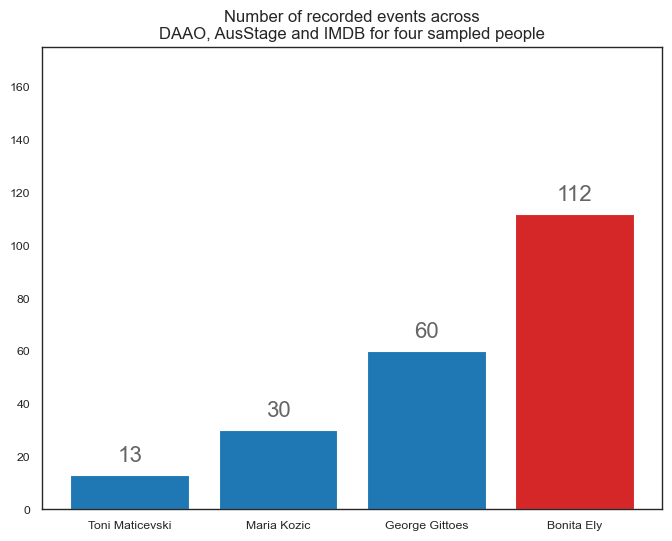

In [501]:
# generate a bar chart with the values 26, 34 and 100
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.bar([1,2,3,4], [13,30,60,112], color=['tab:blue','tab:blue','tab:blue','tab:red'])

# add data labels on top of bars
for i, v in enumerate([13,30,60,112]):
    plt.text(i+1, v+5, str(v), color='black', alpha=0.6, size=16, ha='center')

# change x-axis labels to 'A', 'B' and 'C'
plt.xticks([1,2,3,4], ['Toni Maticevski','Maria Kozic','George Gittoes','Bonita Ely'])

plt.title('Number of recorded events across\nDAAO, AusStage and IMDB for four sampled people', size=12)

# increase y-axis limit to 200
plt.ylim(0,175)

plt.show()

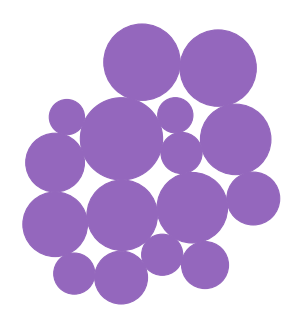

In [536]:
import numpy as np
import matplotlib.pyplot as plt

# create 10 circles with different radii
r = np.random.randint(5,15, size=16)

class C():
    def __init__(self,r):
        self.N = len(r)
        self.x = np.ones((self.N,3))
        self.x[:,2] = r
        maxstep = 2*self.x[:,2].max()
        length = np.ceil(np.sqrt(self.N))
        grid = np.arange(0,length*maxstep,maxstep)
        gx,gy = np.meshgrid(grid,grid)
        self.x[:,0] = gx.flatten()[:self.N]
        self.x[:,1] = gy.flatten()[:self.N]
        self.x[:,:2] = self.x[:,:2] - np.mean(self.x[:,:2], axis=0)

        self.step = self.x[:,2].min()
        self.p = lambda x,y: np.sum((x**2+y**2)**2)
        self.E = self.energy()
        self.iter = 1.

    def minimize(self):
        while self.iter < 1000*self.N:
            for i in range(self.N):
                rand = np.random.randn(2)*self.step/self.iter
                self.x[i,:2] += rand
                e = self.energy()
                if (e < self.E and self.isvalid(i)):
                    self.E = e
                    self.iter = 1.
                else:
                    self.x[i,:2] -= rand
                    self.iter += 1.

    def energy(self):
        return self.p(self.x[:,0], self.x[:,1])

    def distance(self,x1,x2):
        return np.sqrt((x1[0]-x2[0])**2+(x1[1]-x2[1])**2)-x1[2]-x2[2]

    def isvalid(self, i):
        for j in range(self.N):
            if i!=j: 
                if self.distance(self.x[i,:], self.x[j,:]) < 0:
                    return False
        return True

    def plot(self, ax):
        for i in range(self.N):
            circ = plt.Circle(self.x[i,:2],self.x[i,2], color='tab:purple')
            ax.add_patch(circ)

c = C(r)

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
ax.axis("off")

c.minimize()

c.plot(ax)
ax.relim()
ax.autoscale_view()
plt.show()

In [22]:
# read csv
import pandas as pd
george_df = pd.read_csv('data/selected4_events.csv')

In [278]:
g1.iloc[i]

Event      University of Sydney, NSW
Start                           1968
End                             1968
Country                    Australia
Person                George Gittoes
Dataset                         DAAO
Type                        Training
Name: 11, dtype: object

In [5]:
george_df['Person'].value_counts()

Bonita Ely         112
George Gittoes      60
Maria Kozic         30
Toni Maticevski     13
Name: Person, dtype: int64

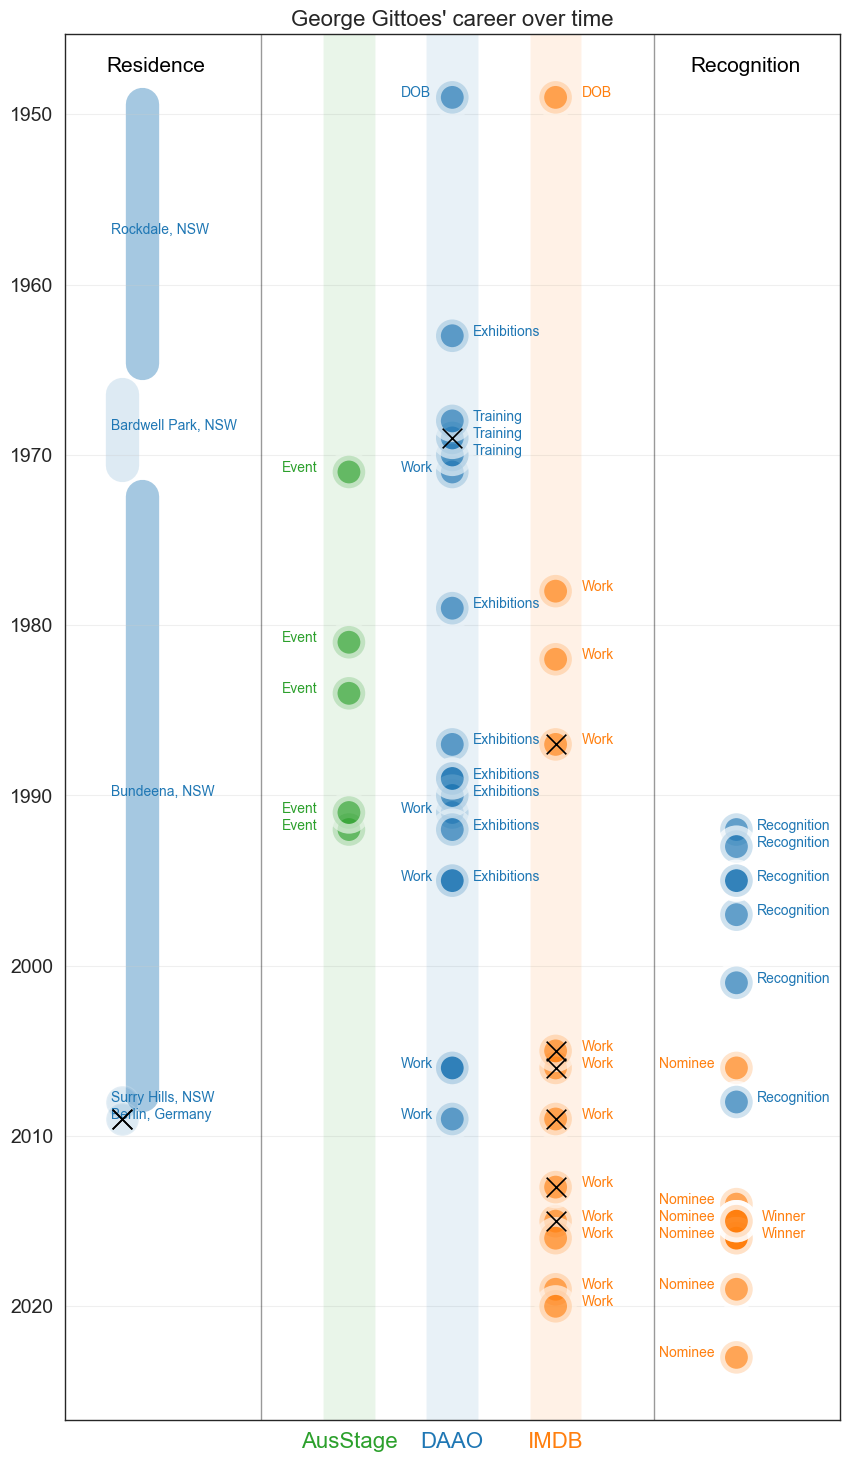

In [444]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='white', context='paper', rc={'figure.figsize':(14, 4)})

george_df = pd.read_csv('data/selected4_events.csv')

# change values with birth date to 'Birth'
george_df['Type'] = np.where(george_df['Type'] == 'Birth date', 'DOB', george_df['Type'])
# george_df['Event'] = np.where(george_df['Event'] == 'Berlin, Germany', 'Berlin, \nGermany', george_df['Event'])

george_df = george_df[george_df.Person == 'George Gittoes'] 
g1 = george_df.copy()

ausstage = george_df[george_df.Dataset == 'AusStage'].reset_index(drop=True)
daao = george_df[george_df.Dataset == 'DAAO'].reset_index(drop=True)
imdb = george_df[george_df.Dataset == 'IMDB'].reset_index(drop=True)

g1 = g1[g1.Type != 'Residence']
g1_awards = g1[(g1.Type == 'Recognition') | (g1.Type == 'Winner') | (g1.Type == 'Nominee')]
g1 = g1[g1.Type != 'Winner']
g1 = g1[g1.Type != 'Nominee']
g1 = g1[g1.Type != 'Recognition']

fig, ax = plt.subplots(figsize=(10,18))
sns.scatterplot(data=g1.sort_values(['Dataset'], ascending=[True]),
x='Dataset', y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, linewidth=7,
palette=['tab:green','tab:blue','tab:orange'], legend=False)

plt.scatter(data=g1[(g1.Country != 'Australia') & (~g1.Country.isnull())].sort_values(['Dataset'], ascending=[True]),
            x='Dataset',y='Start', marker='x', color='black', s=200, zorder=10)

# change x-axis labels to be different colors
for label in ax.get_xticklabels():
    dataset_label = label.get_text()
    if dataset_label == 'AusStage': label.set_color('tab:green')
    elif dataset_label == 'DAAO': label.set_color('tab:blue')
    elif dataset_label == 'IMDB': label.set_color('tab:orange')

sns.scatterplot(data=g1_awards[g1_awards.Type != 'Recognition'].sort_values(['Dataset'], ascending=[True]),
x=3.75, y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, palette=['tab:orange'], legend=True,linewidth=7)

sns.scatterplot(data=g1_awards[g1_awards.Type == 'Recognition'].sort_values(['Dataset'], ascending=[True]),
x=3.75, y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, palette=['tab:blue'], legend=True, linewidth=7)

plt.legend(loc='lower left', fontsize=14, ncol=2, facecolor='white')
# for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title("George Gittoes' career over time" , fontsize=16)

# add higlighted rectangles centered at 0
plt.axvspan(-0.25, 0.25, facecolor='tab:green', alpha=0.1)
plt.axvspan(0.75, 1.25, facecolor='tab:blue', alpha=0.1)
plt.axvspan(1.75, 2.25, facecolor='tab:orange', alpha=0.1)


# add vertical line
# add a horizontal line  between the start and end of each person's career
for idx,p in enumerate(daao[daao['Type'] == 'Residence'].sort_values('Start')['Event'].unique()):
    start = daao[(daao['Event']==p)]['Start'].min()
    end = daao[(daao['Event']==p)]['End'].max()
    if (start==end) | (start+1==end): 
        
        sns.scatterplot(data=daao[daao['Event']==p].sort_values(['Start'], ascending=[True]),
        x=-2.2, y='Start',hue='Event', ax=ax, s=550, alpha=0.15, palette=['tab:blue'], legend=False)

        plt.scatter(data=daao[(daao['Event']==p) & (daao.Country != 'Australia') & (~daao.Country.isnull())].sort_values(['Start'], ascending=[True]),
            x=-2.2,y=2009, marker='x', color='black', s=200, zorder=10)
        
    else:
        if idx % 2 == 0: plt.plot([-2,-2], [start+0.4, end-0.4], linewidth=24, zorder=0, color = 'tab:blue', alpha=0.4)
        else: plt.plot([-2.2,-2.2], [start+0.4, end-0.4], linewidth=24, zorder=0, color = 'tab:blue', alpha=0.15)


# add annottation above the vertical line
plt.annotate('Residence', (-2.35, g1['Start'].min()-1.5), fontsize=15, alpha=1, color='black')


# add annottation above the vertical line
plt.annotate('Recognition', (3.3, g1['Start'].min()-1.5), fontsize=15, alpha=1, color='black')


# add text labels for each Residence event
for idx,p in enumerate(daao[daao['Type'] == 'Residence'].sort_values('Start')['Event'].unique()):
    start = daao[(daao['Event']==p)]['Start'].min()
    end = daao[(daao['Event']==p)]['End'].max()
    if (start==end) | (start+1==end): 
        ax.annotate(p, (-2.3, start), fontsize=10, alpha=1, color='tab:blue')
    else:
        if idx % 2 == 0: ax.annotate(p, (-2.3, (start+end)/2), fontsize=10, alpha=1, color='tab:blue')
        else: ax.annotate(p, (-2.3, (start+end)/2), fontsize=10, alpha=1, color='tab:blue')

daao = daao[daao.Type != 'Residence']

for idx,x in enumerate(ausstage['Type']):
    y = ausstage[ausstage.Type.str.contains(x)]['Start'][idx]
    ax.annotate(x, (-.65, y), fontsize=10, alpha=1, color='tab:green')

for idx,x in enumerate(daao['Type'].unique()):
    y = george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x))]['Start'].unique()
    for y in george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x))]['Start'].unique():
        z = george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x)) & (george_df.Start == y)]['Start'].iloc[0]
        if (x == 'Recognition'): ax.annotate(x, (3.95, z), fontsize=10, alpha=1, color='tab:blue')
        else:
            if idx % 2 == 0: ax.annotate(x, (0.5, z), fontsize=10, alpha=1, color='tab:blue')
            else: ax.annotate(x, (1.2, z), fontsize=10, alpha=1, color='tab:blue')

for idx,x in enumerate(imdb['Type'].unique()):
    y = george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x))]['Start'].unique()
    for y in george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x))]['Start'].unique():
        z = george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x)) & (george_df.Start == y)]['Start'].iloc[0]
        if (x == 'Nominee'): ax.annotate(x, (3, z), fontsize=10, alpha=1, color='tab:orange')
        elif (x == 'Winner'): ax.annotate(x, (4, z), fontsize=10, alpha=1, color='tab:orange')
        else:
            ax.annotate(x, (2.25, z), fontsize=10, alpha=1, color='tab:orange')

# change the order of the y-axis
plt.gca().invert_yaxis()

# add more space between the x-axis ticks
plt.xticks(np.arange(0, 10, 1))

# move legend to specific location
# plt.legend(loc='upper right', fontsize=12, ncol=1, facecolor='white', bbox_to_anchor=(0.965, 0.97))
# for i in range(2): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# remove the legend
plt.legend().remove()

# add vertical lines on 0,1,2
plt.axvline(x=-.85, color='black', alpha=0.4, linestyle='-', linewidth=1)
plt.axvline(x=2.95, color='black', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=0, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=1, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=2, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)

# # add annotation top right of plot to denote the vertical lines
# plt.annotate('| = annual break', xy=(2006.5, -.5), fontsize=12, alpha=0.5)

#remove y-axis title
plt.ylabel('')

# increase y-axis limits to make room for the title
plt.xlim(-2.75, 4.75)

plt.show()


/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_2626/2170158894.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=george_df[george_df['Start'] >= 2004].sort_values('Start'),


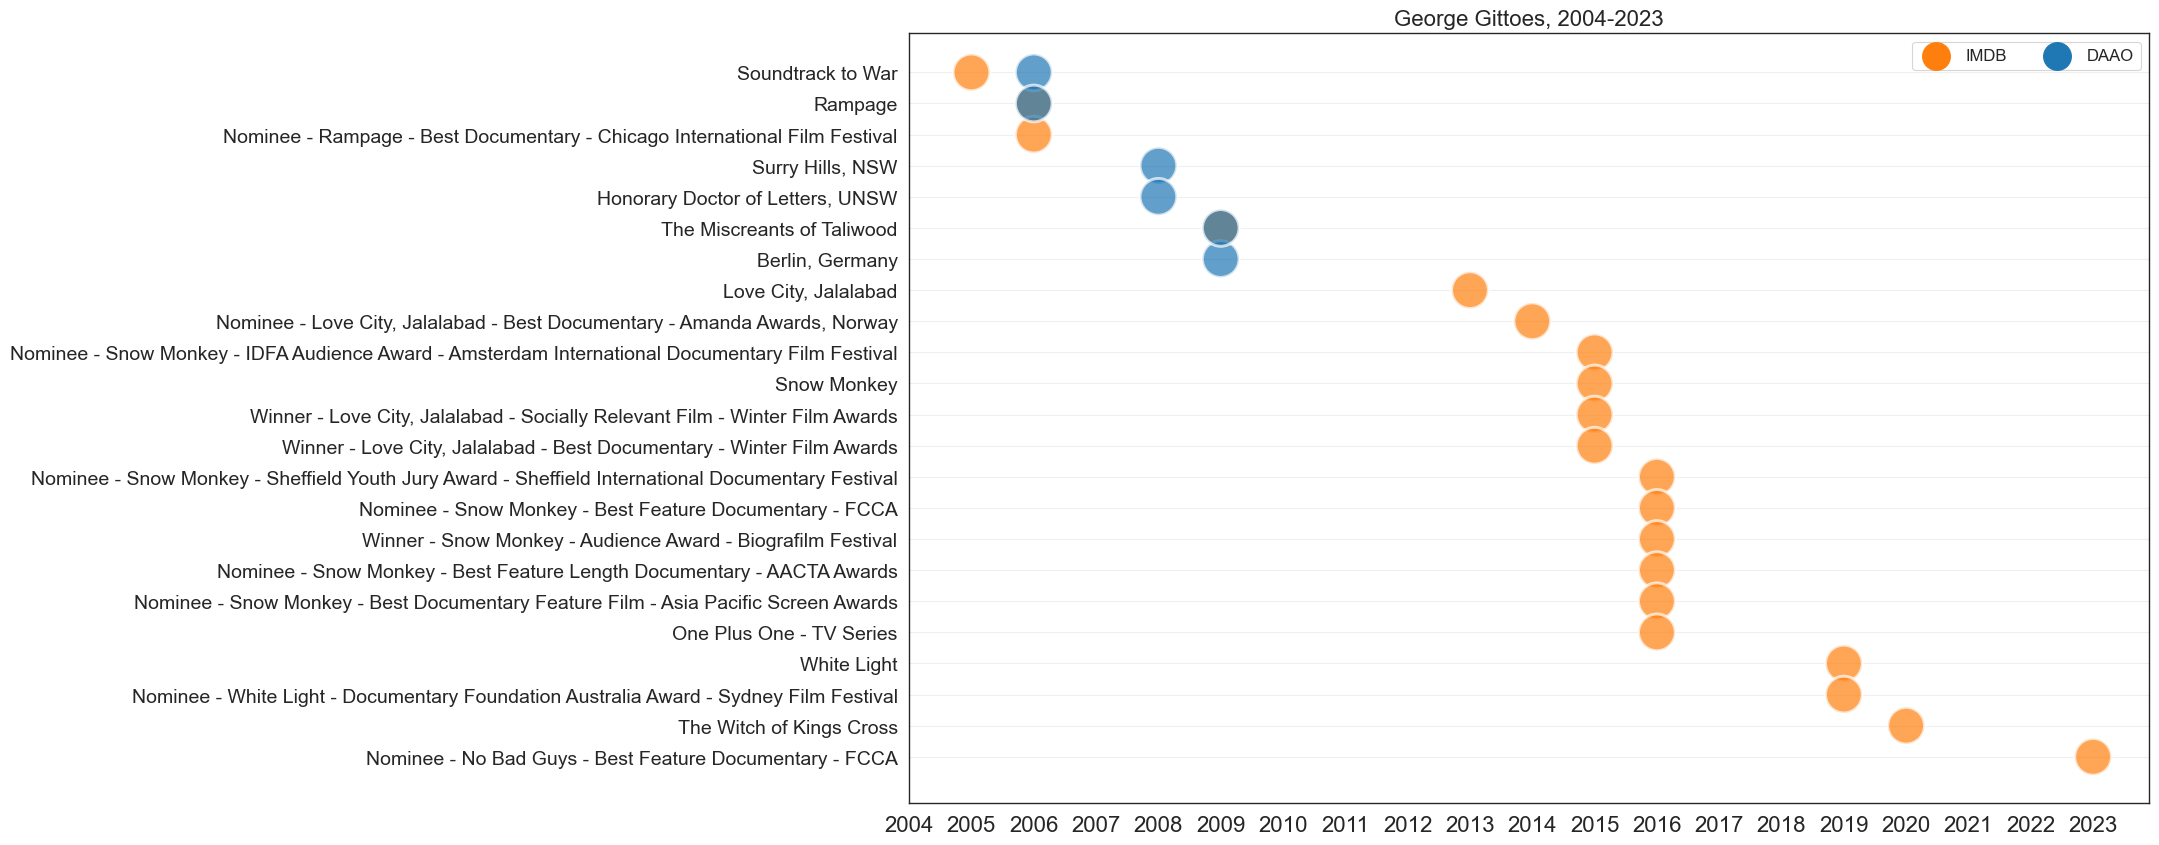

In [489]:
fig, ax = plt.subplots(figsize=(16,10))
sns.scatterplot(data=george_df[george_df['Start'] >= 2004].sort_values('Start'),
x='Start', y='Event', 
hue='Dataset', ax=ax, s=700, alpha=0.7, palette=['tab:orange','tab:blue','tab:orange'])

plt.legend(loc='lower left', fontsize=14, ncol=2, facecolor='white')
# for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title('George Gittoes, 2004-2023' , fontsize=16)

# # add annotation top right of plot to denote the vertical lines
# plt.annotate('| = annual break', xy=(2006.5, -.5), fontsize=12, alpha=0.5)

# move legend to specific location
plt.legend(loc='upper right', fontsize=12, ncol=2, facecolor='white')
for i in range(2): plt.gca().get_legend().legendHandles[i]._sizes = [400]

# show each year on x-acis
plt.xticks(np.arange(2004, 2024, 1))

# increase y-axis limits to make room for the title
plt.ylim(23.5, -1.25)

plt.show()

/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_2626/552588952.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=g1_awards[g1_awards.Type != 'Recognition'].sort_values(['Dataset'], ascending=[True]),


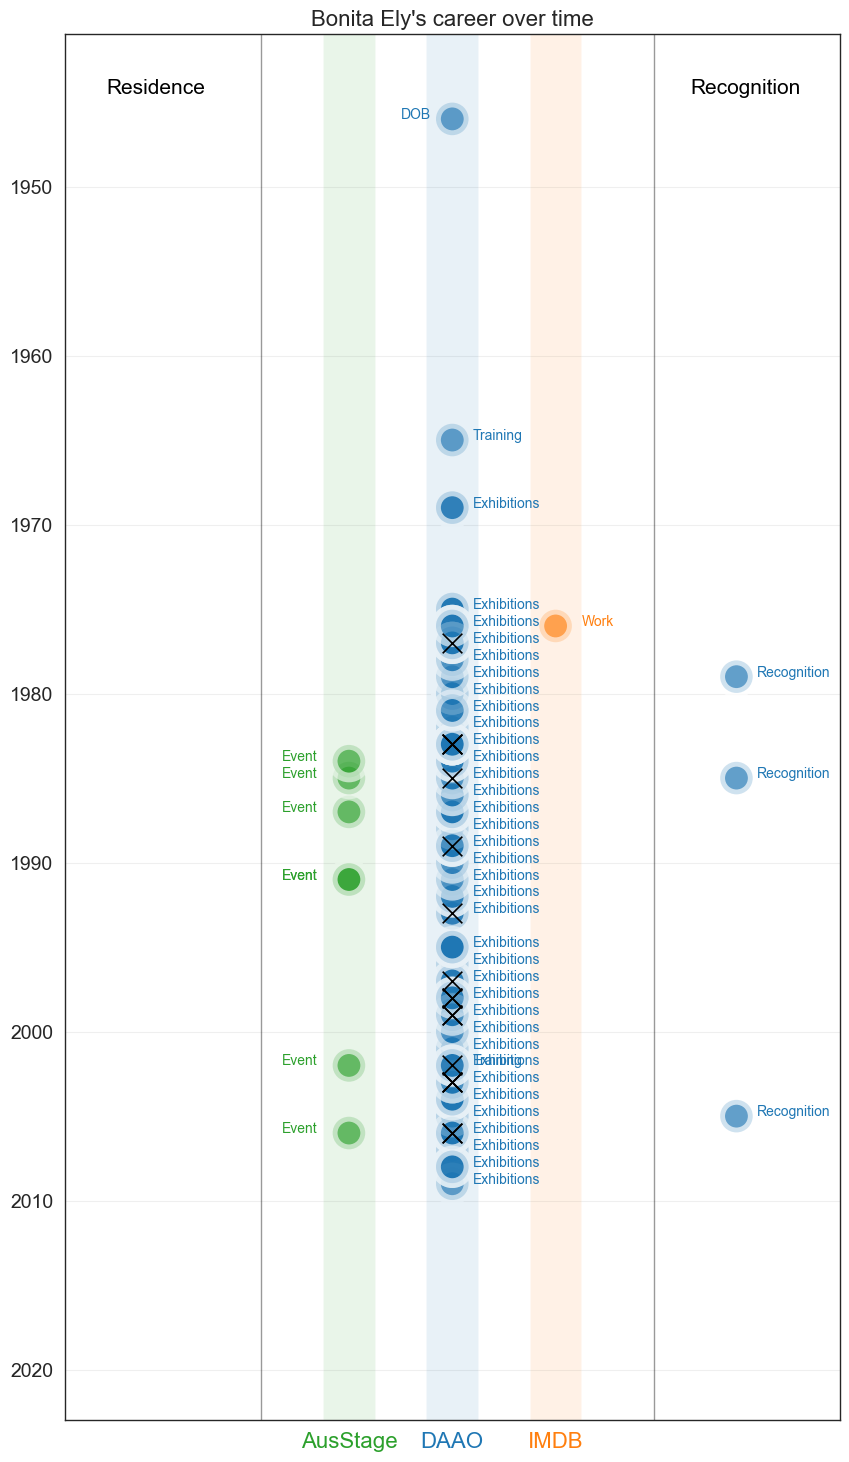

In [502]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='white', context='paper', rc={'figure.figsize':(14, 4)})

george_df = pd.read_csv('data/selected4_events.csv')

# change values with birth date to 'Birth'
george_df['Type'] = np.where(george_df['Type'] == 'Birth date', 'DOB', george_df['Type'])
# george_df['Event'] = np.where(george_df['Event'] == 'Berlin, Germany', 'Berlin, \nGermany', george_df['Event'])

george_df = george_df[george_df.Person == 'Bonita Ely'] 
g1 = george_df.copy()

ausstage = george_df[george_df.Dataset == 'AusStage'].reset_index(drop=True)
daao = george_df[george_df.Dataset == 'DAAO'].reset_index(drop=True)
imdb = george_df[george_df.Dataset == 'IMDB'].reset_index(drop=True)

g1 = g1[g1.Type != 'Residence']
g1_awards = g1[(g1.Type == 'Recognition') | (g1.Type == 'Winner') | (g1.Type == 'Nominee')]
g1 = g1[g1.Type != 'Winner']
g1 = g1[g1.Type != 'Nominee']
g1 = g1[g1.Type != 'Recognition']

fig, ax = plt.subplots(figsize=(10,18))
sns.scatterplot(data=g1.sort_values(['Dataset'], ascending=[True]),
x='Dataset', y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, linewidth=7,
palette=['tab:green','tab:blue','tab:orange'], legend=False)

plt.scatter(data=g1[(g1.Country != 'Australia') & (~g1.Country.isnull())].sort_values(['Dataset'], ascending=[True]),
            x='Dataset',y='Start', marker='x', color='black', s=200, zorder=10)

# change x-axis labels to be different colors
for label in ax.get_xticklabels():
    dataset_label = label.get_text()
    if dataset_label == 'AusStage': label.set_color('tab:green')
    elif dataset_label == 'DAAO': label.set_color('tab:blue')
    elif dataset_label == 'IMDB': label.set_color('tab:orange')

sns.scatterplot(data=g1_awards[g1_awards.Type != 'Recognition'].sort_values(['Dataset'], ascending=[True]),
x=3.75, y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, palette=['tab:orange'], legend=True,linewidth=7)

sns.scatterplot(data=g1_awards[g1_awards.Type == 'Recognition'].sort_values(['Dataset'], ascending=[True]),
x=3.75, y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, palette=['tab:blue'], legend=True, linewidth=7)

plt.legend(loc='lower left', fontsize=14, ncol=2, facecolor='white')
# for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title("Bonita Ely's career over time" , fontsize=16)

# add higlighted rectangles centered at 0
plt.axvspan(-0.25, 0.25, facecolor='tab:green', alpha=0.1)
plt.axvspan(0.75, 1.25, facecolor='tab:blue', alpha=0.1)
plt.axvspan(1.75, 2.25, facecolor='tab:orange', alpha=0.1)


# add vertical line
# add a horizontal line  between the start and end of each person's career
for idx,p in enumerate(daao[daao['Type'] == 'Residence'].sort_values('Start')['Event'].unique()):
    start = daao[(daao['Event']==p)]['Start'].min()
    end = daao[(daao['Event']==p)]['End'].max()
    if (start==end) | (start+1==end): 
        
        sns.scatterplot(data=daao[daao['Event']==p].sort_values(['Start'], ascending=[True]),
        x=-2.2, y='Start',hue='Event', ax=ax, s=550, alpha=0.15, palette=['tab:blue'], legend=False)

        plt.scatter(data=daao[(daao['Event']==p) & (daao.Country != 'Australia') & (~daao.Country.isnull())].sort_values(['Start'], ascending=[True]),
            x=-2.2,y=2009, marker='x', color='black', s=200, zorder=10)
        
    else:
        if idx % 2 == 0: plt.plot([-2,-2], [start+0.4, end-0.4], linewidth=24, zorder=0, color = 'tab:blue', alpha=0.4)
        else: plt.plot([-2.2,-2.2], [start+0.4, end-0.4], linewidth=24, zorder=0, color = 'tab:blue', alpha=0.15)


# add annottation above the vertical line
plt.annotate('Residence', (-2.35, g1['Start'].min()-1.5), fontsize=15, alpha=1, color='black')


# add annottation above the vertical line
plt.annotate('Recognition', (3.3, g1['Start'].min()-1.5), fontsize=15, alpha=1, color='black')


# add text labels for each Residence event
for idx,p in enumerate(daao[daao['Type'] == 'Residence'].sort_values('Start')['Event'].unique()):
    start = daao[(daao['Event']==p)]['Start'].min()
    end = daao[(daao['Event']==p)]['End'].max()
    if (start==end) | (start+1==end): 
        ax.annotate(p, (-2.3, start), fontsize=10, alpha=1, color='tab:blue')
    else:
        if idx % 2 == 0: ax.annotate(p, (-2.3, (start+end)/2), fontsize=10, alpha=1, color='tab:blue')
        else: ax.annotate(p, (-2.3, (start+end)/2), fontsize=10, alpha=1, color='tab:blue')

daao = daao[daao.Type != 'Residence']

for idx,x in enumerate(ausstage['Type']):
    y = ausstage[ausstage.Type.str.contains(x)]['Start'][idx]
    ax.annotate(x, (-.65, y), fontsize=10, alpha=1, color='tab:green')

for idx,x in enumerate(daao['Type'].unique()):
    y = george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x))]['Start'].unique()
    for y in george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x))]['Start'].unique():
        z = george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x)) & (george_df.Start == y)]['Start'].iloc[0]
        if (x == 'Recognition'): ax.annotate(x, (3.95, z), fontsize=10, alpha=1, color='tab:blue')
        else:
            if idx % 2 == 0: ax.annotate(x, (0.5, z), fontsize=10, alpha=1, color='tab:blue')
            else: ax.annotate(x, (1.2, z), fontsize=10, alpha=1, color='tab:blue')

for idx,x in enumerate(imdb['Type'].unique()):
    y = george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x))]['Start'].unique()
    for y in george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x))]['Start'].unique():
        z = george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x)) & (george_df.Start == y)]['Start'].iloc[0]
        if (x == 'Nominee'): ax.annotate(x, (3, z), fontsize=10, alpha=1, color='tab:orange')
        elif (x == 'Winner'): ax.annotate(x, (4, z), fontsize=10, alpha=1, color='tab:orange')
        else:
            ax.annotate(x, (2.25, z), fontsize=10, alpha=1, color='tab:orange')

plt.ylim(1941,2023)

# change the order of the y-axis
plt.gca().invert_yaxis()

# add more space between the x-axis ticks
plt.xticks(np.arange(0, 10, 1))

# move legend to specific location
# plt.legend(loc='upper right', fontsize=12, ncol=1, facecolor='white', bbox_to_anchor=(0.965, 0.97))
# for i in range(2): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# remove the legend
plt.legend().remove()

# add vertical lines on 0,1,2
plt.axvline(x=-.85, color='black', alpha=0.4, linestyle='-', linewidth=1)
plt.axvline(x=2.95, color='black', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=0, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=1, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=2, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)

# # add annotation top right of plot to denote the vertical lines
# plt.annotate('| = annual break', xy=(2006.5, -.5), fontsize=12, alpha=0.5)

#remove y-axis title
plt.ylabel('')

# increase y-axis limits to make room for the title
plt.xlim(-2.75, 4.75)
plt.show()


/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_2626/138766241.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=george_df[george_df['Start'] >= 2004].sort_values('Start'),


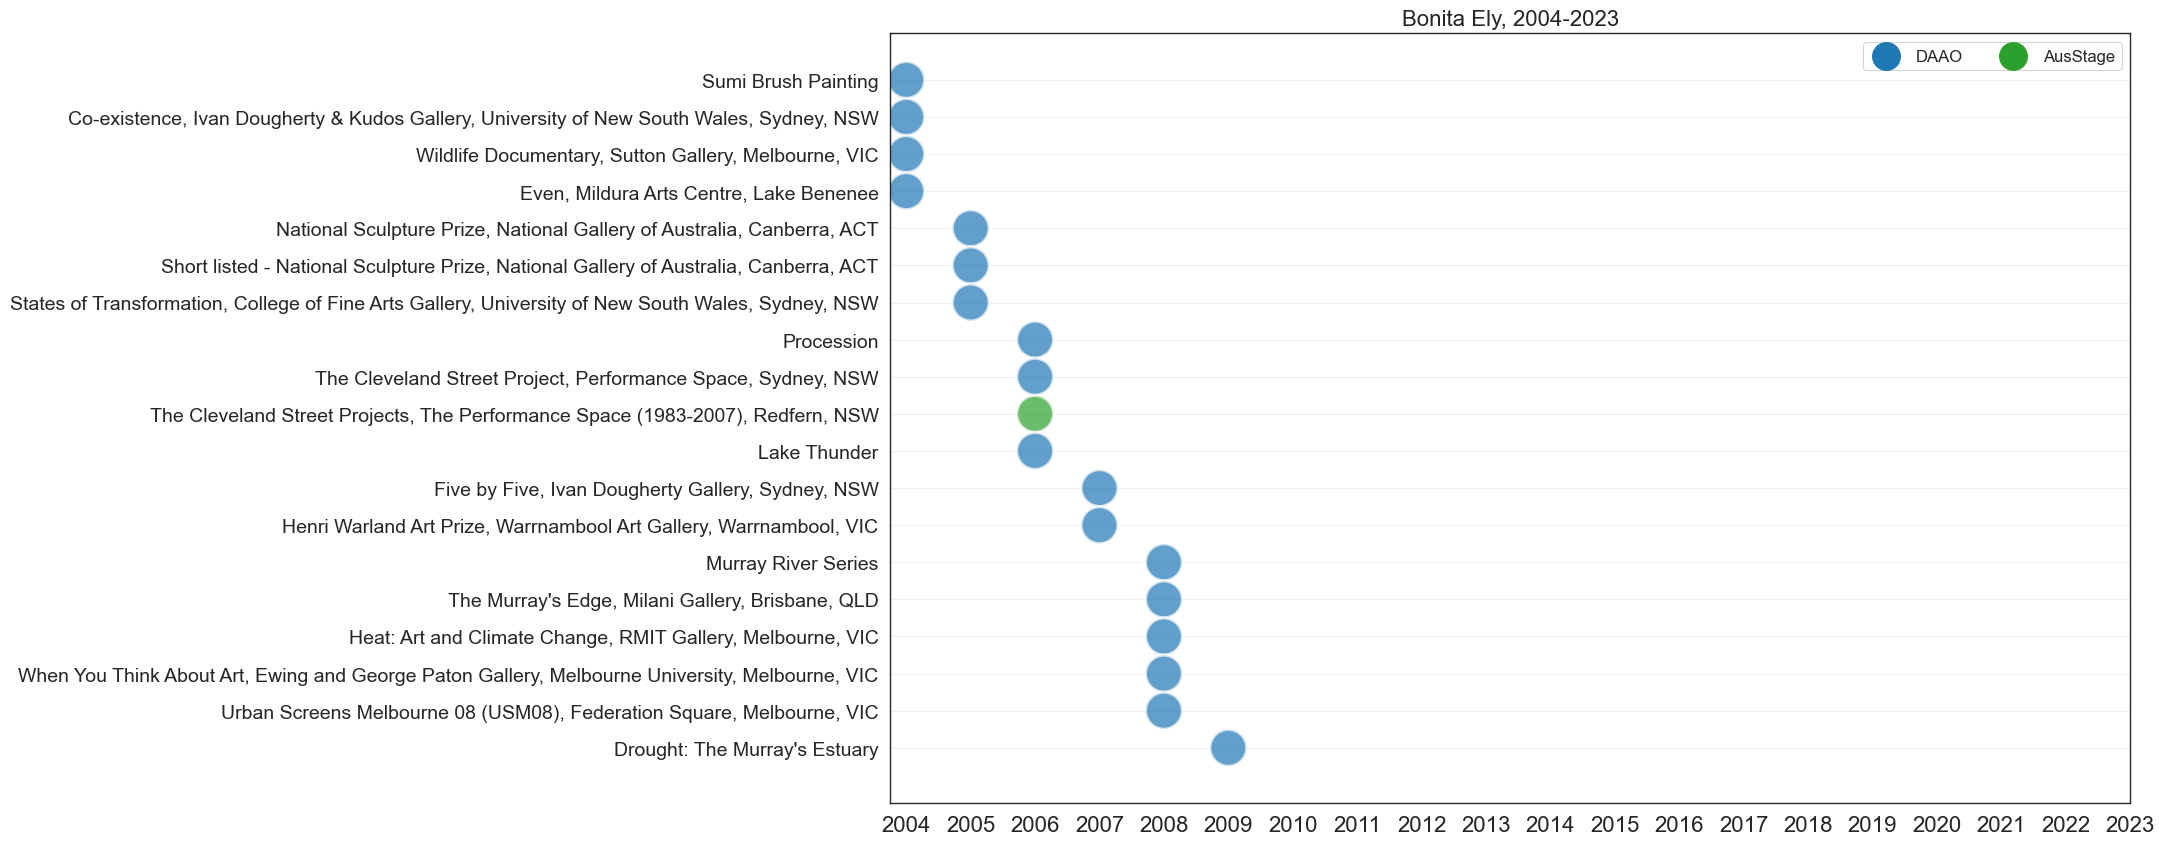

In [507]:
fig, ax = plt.subplots(figsize=(16,10))
sns.scatterplot(data=george_df[george_df['Start'] >= 2004].sort_values('Start'),
x='Start', y='Event', 
hue='Dataset', ax=ax, s=700, alpha=0.7, palette=['tab:blue','tab:green','tab:orange'])

plt.legend(loc='lower left', fontsize=14, ncol=2, facecolor='white')
# for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title('Bonita Ely, 2004-2023' , fontsize=16)

# # add annotation top right of plot to denote the vertical lines
# plt.annotate('| = annual break', xy=(2006.5, -.5), fontsize=12, alpha=0.5)

# move legend to specific location
plt.legend(loc='upper right', fontsize=12, ncol=2, facecolor='white')
for i in range(2): plt.gca().get_legend().legendHandles[i]._sizes = [400]

# show each year on x-acis
plt.xticks(np.arange(2004, 2024, 1))

# increase y-axis limits to make room for the title
plt.ylim(19.5, -1.25)

plt.show()

/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_2626/2410334351.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=g1_awards[g1_awards.Type == 'Recognition'].sort_values(['Dataset'], ascending=[True]),


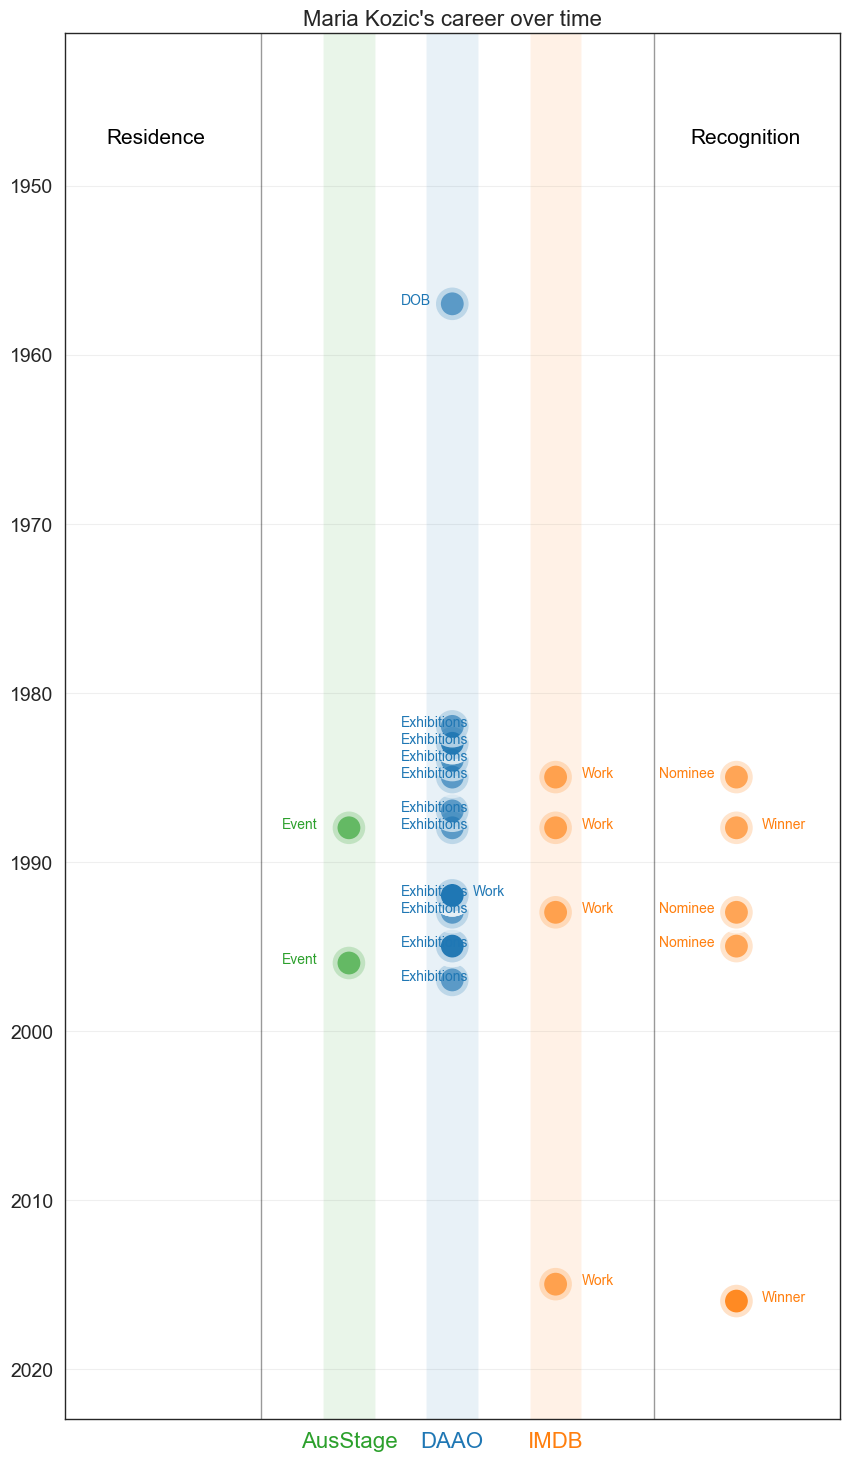

In [511]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='white', context='paper', rc={'figure.figsize':(14, 4)})

george_df = pd.read_csv('data/selected4_events.csv')

# change values with birth date to 'Birth'
george_df['Type'] = np.where(george_df['Type'] == 'Birth date', 'DOB', george_df['Type'])
# george_df['Event'] = np.where(george_df['Event'] == 'Berlin, Germany', 'Berlin, \nGermany', george_df['Event'])

george_df = george_df[george_df.Person == 'Maria Kozic'] 
g1 = george_df.copy()

ausstage = george_df[george_df.Dataset == 'AusStage'].reset_index(drop=True)
daao = george_df[george_df.Dataset == 'DAAO'].reset_index(drop=True)
imdb = george_df[george_df.Dataset == 'IMDB'].reset_index(drop=True)

g1 = g1[g1.Type != 'Residence']
g1_awards = g1[(g1.Type == 'Recognition') | (g1.Type == 'Winner') | (g1.Type == 'Nominee')]
g1 = g1[g1.Type != 'Winner']
g1 = g1[g1.Type != 'Nominee']
g1 = g1[g1.Type != 'Recognition']

fig, ax = plt.subplots(figsize=(10,18))
sns.scatterplot(data=g1.sort_values(['Dataset'], ascending=[True]),
x='Dataset', y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, linewidth=7,
palette=['tab:green','tab:blue','tab:orange'], legend=False)

plt.scatter(data=g1[(g1.Country != 'Australia') & (~g1.Country.isnull())].sort_values(['Dataset'], ascending=[True]),
            x='Dataset',y='Start', marker='x', color='black', s=200, zorder=10)

# change x-axis labels to be different colors
for label in ax.get_xticklabels():
    dataset_label = label.get_text()
    if dataset_label == 'AusStage': label.set_color('tab:green')
    elif dataset_label == 'DAAO': label.set_color('tab:blue')
    elif dataset_label == 'IMDB': label.set_color('tab:orange')

sns.scatterplot(data=g1_awards[g1_awards.Type != 'Recognition'].sort_values(['Dataset'], ascending=[True]),
x=3.75, y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, palette=['tab:orange'], legend=True,linewidth=7)

sns.scatterplot(data=g1_awards[g1_awards.Type == 'Recognition'].sort_values(['Dataset'], ascending=[True]),
x=3.75, y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, palette=['tab:blue'], legend=True, linewidth=7)

plt.legend(loc='lower left', fontsize=14, ncol=2, facecolor='white')
# for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title("Maria Kozic's career over time" , fontsize=16)

# add higlighted rectangles centered at 0
plt.axvspan(-0.25, 0.25, facecolor='tab:green', alpha=0.1)
plt.axvspan(0.75, 1.25, facecolor='tab:blue', alpha=0.1)
plt.axvspan(1.75, 2.25, facecolor='tab:orange', alpha=0.1)


# add vertical line
# add a horizontal line  between the start and end of each person's career
for idx,p in enumerate(daao[daao['Type'] == 'Residence'].sort_values('Start')['Event'].unique()):
    start = daao[(daao['Event']==p)]['Start'].min()
    end = daao[(daao['Event']==p)]['End'].max()
    if (start==end) | (start+1==end): 
        
        sns.scatterplot(data=daao[daao['Event']==p].sort_values(['Start'], ascending=[True]),
        x=-2.2, y='Start',hue='Event', ax=ax, s=550, alpha=0.15, palette=['tab:blue'], legend=False)

        plt.scatter(data=daao[(daao['Event']==p) & (daao.Country != 'Australia') & (~daao.Country.isnull())].sort_values(['Start'], ascending=[True]),
            x=-2.2,y=2009, marker='x', color='black', s=200, zorder=10)
        
    else:
        if idx % 2 == 0: plt.plot([-2,-2], [start+0.4, end-0.4], linewidth=24, zorder=0, color = 'tab:blue', alpha=0.4)
        else: plt.plot([-2.2,-2.2], [start+0.4, end-0.4], linewidth=24, zorder=0, color = 'tab:blue', alpha=0.15)


# add annottation above the vertical line
plt.annotate('Residence', (-2.35, 1949-1.5), fontsize=15, alpha=1, color='black')


# add annottation above the vertical line
plt.annotate('Recognition', (3.3, 1949-1.5), fontsize=15, alpha=1, color='black')


# add text labels for each Residence event
for idx,p in enumerate(daao[daao['Type'] == 'Residence'].sort_values('Start')['Event'].unique()):
    start = daao[(daao['Event']==p)]['Start'].min()
    end = daao[(daao['Event']==p)]['End'].max()
    if (start==end) | (start+1==end): 
        ax.annotate(p, (-2.3, start), fontsize=10, alpha=1, color='tab:blue')
    else:
        if idx % 2 == 0: ax.annotate(p, (-2.3, (start+end)/2), fontsize=10, alpha=1, color='tab:blue')
        else: ax.annotate(p, (-2.3, (start+end)/2), fontsize=10, alpha=1, color='tab:blue')

daao = daao[daao.Type != 'Residence']

for idx,x in enumerate(ausstage['Type']):
    y = ausstage[ausstage.Type.str.contains(x)]['Start'][idx]
    ax.annotate(x, (-.65, y), fontsize=10, alpha=1, color='tab:green')

for idx,x in enumerate(daao['Type'].unique()):
    y = george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x))]['Start'].unique()
    for y in george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x))]['Start'].unique():
        z = george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x)) & (george_df.Start == y)]['Start'].iloc[0]
        if (x == 'Recognition'): ax.annotate(x, (3.95, z), fontsize=10, alpha=1, color='tab:blue')
        else:
            if idx % 2 == 0: ax.annotate(x, (0.5, z), fontsize=10, alpha=1, color='tab:blue')
            else: ax.annotate(x, (1.2, z), fontsize=10, alpha=1, color='tab:blue')

for idx,x in enumerate(imdb['Type'].unique()):
    y = george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x))]['Start'].unique()
    for y in george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x))]['Start'].unique():
        z = george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x)) & (george_df.Start == y)]['Start'].iloc[0]
        if (x == 'Nominee'): ax.annotate(x, (3, z), fontsize=10, alpha=1, color='tab:orange')
        elif (x == 'Winner'): ax.annotate(x, (4, z), fontsize=10, alpha=1, color='tab:orange')
        else:
            ax.annotate(x, (2.25, z), fontsize=10, alpha=1, color='tab:orange')

plt.ylim(1941,2023)

# change the order of the y-axis
plt.gca().invert_yaxis()

# add more space between the x-axis ticks
plt.xticks(np.arange(0, 10, 1))

# move legend to specific location
# plt.legend(loc='upper right', fontsize=12, ncol=1, facecolor='white', bbox_to_anchor=(0.965, 0.97))
# for i in range(2): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# remove the legend
plt.legend().remove()

# add vertical lines on 0,1,2
plt.axvline(x=-.85, color='black', alpha=0.4, linestyle='-', linewidth=1)
plt.axvline(x=2.95, color='black', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=0, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=1, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=2, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)

# # add annotation top right of plot to denote the vertical lines
# plt.annotate('| = annual break', xy=(2006.5, -.5), fontsize=12, alpha=0.5)

#remove y-axis title
plt.ylabel('')

# increase y-axis limits to make room for the title
plt.xlim(-2.75, 4.75)
plt.show()


/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_2626/779980040.py:2: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(data=george_df[george_df['Start'] >= 2004].sort_values('Start'),


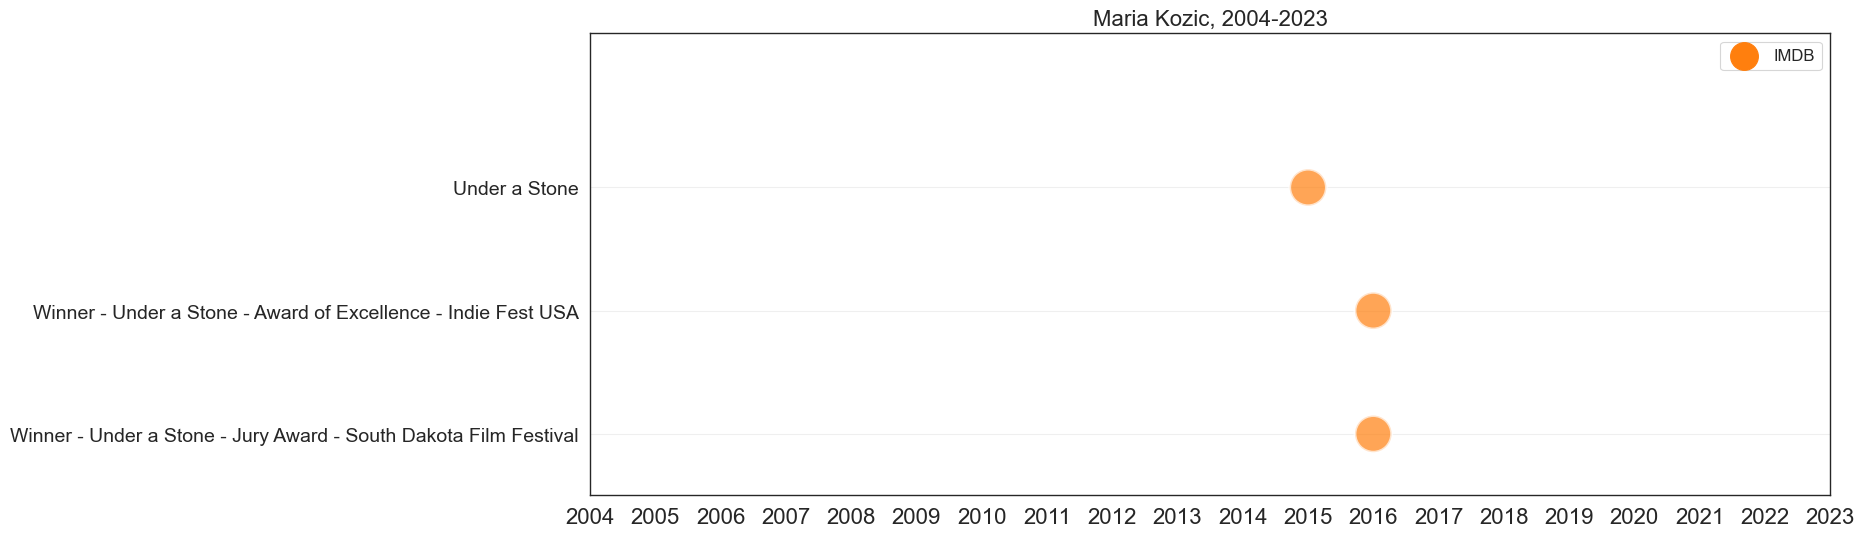

In [518]:
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(data=george_df[george_df['Start'] >= 2004].sort_values('Start'),
x='Start', y='Event', 
hue='Dataset', ax=ax, s=700, alpha=0.7, palette=['tab:orange','tab:green','tab:orange'])

plt.legend(loc='lower left', fontsize=14, ncol=2, facecolor='white')
# for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title('Maria Kozic, 2004-2023' , fontsize=16)

# # add annotation top right of plot to denote the vertical lines
# plt.annotate('| = annual break', xy=(2006.5, -.5), fontsize=12, alpha=0.5)

# move legend to specific location
plt.legend(loc='upper right', fontsize=12, ncol=2, facecolor='white')
for i in range(1): plt.gca().get_legend().legendHandles[i]._sizes = [400]

# show each year on x-acis
plt.xticks(np.arange(2004, 2024, 1))

# increase y-axis limits to make room for the title
plt.ylim(2.5, -1.25)

plt.show()

/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_10166/3505309034.py:41: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=g1_awards[g1_awards.Type != 'Recognition'].sort_values(['Dataset'], ascending=[True]),
/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_10166/3505309034.py:44: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=g1_awards[g1_awards.Type == 'Recognition'].sort_values(['Dataset'], ascending=[True]),


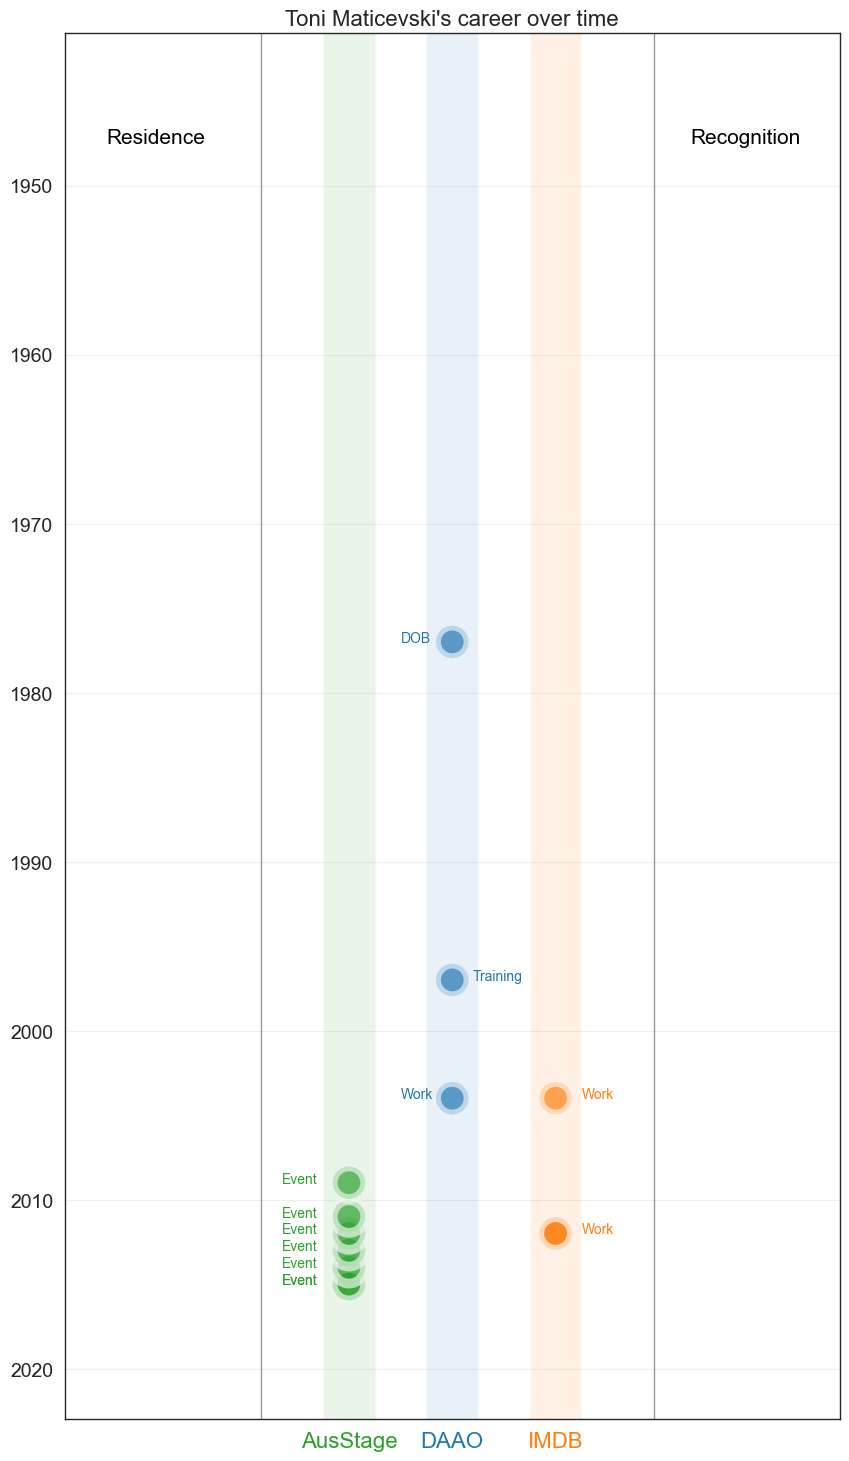

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='white', context='paper', rc={'figure.figsize':(14, 4)})

george_df = pd.read_csv('data/selected4_events.csv')

# change values with birth date to 'Birth'
george_df['Type'] = np.where(george_df['Type'] == 'Birth date', 'DOB', george_df['Type'])
# george_df['Event'] = np.where(george_df['Event'] == 'Berlin, Germany', 'Berlin, \nGermany', george_df['Event'])

george_df = george_df[george_df.Person == 'Toni Maticevski'] 
g1 = george_df.copy()

ausstage = george_df[george_df.Dataset == 'AusStage'].reset_index(drop=True)
daao = george_df[george_df.Dataset == 'DAAO'].reset_index(drop=True)
imdb = george_df[george_df.Dataset == 'IMDB'].reset_index(drop=True)

g1 = g1[g1.Type != 'Residence']
g1_awards = g1[(g1.Type == 'Recognition') | (g1.Type == 'Winner') | (g1.Type == 'Nominee')]
g1 = g1[g1.Type != 'Winner']
g1 = g1[g1.Type != 'Nominee']
g1 = g1[g1.Type != 'Recognition']

fig, ax = plt.subplots(figsize=(10,18))
sns.scatterplot(data=g1.sort_values(['Dataset'], ascending=[True]),
x='Dataset', y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, linewidth=7,
palette=['tab:green','tab:blue','tab:orange'], legend=False)

plt.scatter(data=g1[(g1.Country != 'Australia') & (~g1.Country.isnull())].sort_values(['Dataset'], ascending=[True]),
            x='Dataset',y='Start', marker='x', color='black', s=200, zorder=10)

# change x-axis labels to be different colors
for label in ax.get_xticklabels():
    dataset_label = label.get_text()
    if dataset_label == 'AusStage': label.set_color('tab:green')
    elif dataset_label == 'DAAO': label.set_color('tab:blue')
    elif dataset_label == 'IMDB': label.set_color('tab:orange')

sns.scatterplot(data=g1_awards[g1_awards.Type != 'Recognition'].sort_values(['Dataset'], ascending=[True]),
x=3.75, y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, palette=['tab:orange'], legend=True,linewidth=7)

sns.scatterplot(data=g1_awards[g1_awards.Type == 'Recognition'].sort_values(['Dataset'], ascending=[True]),
x=3.75, y='Start', hue='Dataset', ax=ax, s=550, alpha=0.7, palette=['tab:blue'], legend=True, linewidth=7)

plt.legend(loc='lower left', fontsize=14, ncol=2, facecolor='white')
# for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title("Toni Maticevski's career over time" , fontsize=16)

# add higlighted rectangles centered at 0
plt.axvspan(-0.25, 0.25, facecolor='tab:green', alpha=0.1)
plt.axvspan(0.75, 1.25, facecolor='tab:blue', alpha=0.1)
plt.axvspan(1.75, 2.25, facecolor='tab:orange', alpha=0.1)


# add vertical line
# add a horizontal line  between the start and end of each person's career
for idx,p in enumerate(daao[daao['Type'] == 'Residence'].sort_values('Start')['Event'].unique()):
    start = daao[(daao['Event']==p)]['Start'].min()
    end = daao[(daao['Event']==p)]['End'].max()
    if (start==end) | (start+1==end): 
        
        sns.scatterplot(data=daao[daao['Event']==p].sort_values(['Start'], ascending=[True]),
        x=-2.2, y='Start',hue='Event', ax=ax, s=550, alpha=0.15, palette=['tab:blue'], legend=False)

        plt.scatter(data=daao[(daao['Event']==p) & (daao.Country != 'Australia') & (~daao.Country.isnull())].sort_values(['Start'], ascending=[True]),
            x=-2.2,y=2009, marker='x', color='black', s=200, zorder=10)
        
    else:
        if idx % 2 == 0: plt.plot([-2,-2], [start+0.4, end-0.4], linewidth=24, zorder=0, color = 'tab:blue', alpha=0.4)
        else: plt.plot([-2.2,-2.2], [start+0.4, end-0.4], linewidth=24, zorder=0, color = 'tab:blue', alpha=0.15)


# add annottation above the vertical line
plt.annotate('Residence', (-2.35, 1949-1.5), fontsize=15, alpha=1, color='black')


# add annottation above the vertical line
plt.annotate('Recognition', (3.3, 1949-1.5), fontsize=15, alpha=1, color='black')


# add text labels for each Residence event
for idx,p in enumerate(daao[daao['Type'] == 'Residence'].sort_values('Start')['Event'].unique()):
    start = daao[(daao['Event']==p)]['Start'].min()
    end = daao[(daao['Event']==p)]['End'].max()
    if (start==end) | (start+1==end): 
        ax.annotate(p, (-2.3, start), fontsize=10, alpha=1, color='tab:blue')
    else:
        if idx % 2 == 0: ax.annotate(p, (-2.3, (start+end)/2), fontsize=10, alpha=1, color='tab:blue')
        else: ax.annotate(p, (-2.3, (start+end)/2), fontsize=10, alpha=1, color='tab:blue')

daao = daao[daao.Type != 'Residence']

for idx,x in enumerate(ausstage['Type']):
    y = ausstage[ausstage.Type.str.contains(x)]['Start'][idx]
    ax.annotate(x, (-.65, y), fontsize=10, alpha=1, color='tab:green')

for idx,x in enumerate(daao['Type'].unique()):
    y = george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x))]['Start'].unique()
    for y in george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x))]['Start'].unique():
        z = george_df[(george_df.Dataset == 'DAAO') & (george_df.Type.str.contains(x)) & (george_df.Start == y)]['Start'].iloc[0]
        if (x == 'Recognition'): ax.annotate(x, (3.95, z), fontsize=10, alpha=1, color='tab:blue')
        else:
            if idx % 2 == 0: ax.annotate(x, (0.5, z), fontsize=10, alpha=1, color='tab:blue')
            else: ax.annotate(x, (1.2, z), fontsize=10, alpha=1, color='tab:blue')

for idx,x in enumerate(imdb['Type'].unique()):
    y = george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x))]['Start'].unique()
    for y in george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x))]['Start'].unique():
        z = george_df[(george_df.Dataset == 'IMDB') & (george_df.Type.str.contains(x)) & (george_df.Start == y)]['Start'].iloc[0]
        if (x == 'Nominee'): ax.annotate(x, (3, z), fontsize=10, alpha=1, color='tab:orange')
        elif (x == 'Winner'): ax.annotate(x, (4, z), fontsize=10, alpha=1, color='tab:orange')
        else:
            ax.annotate(x, (2.25, z), fontsize=10, alpha=1, color='tab:orange')

plt.ylim(1941,2023)

# change the order of the y-axis
plt.gca().invert_yaxis()

# add more space between the x-axis ticks
plt.xticks(np.arange(0, 10, 1))

# move legend to specific location
# plt.legend(loc='upper right', fontsize=12, ncol=1, facecolor='white', bbox_to_anchor=(0.965, 0.97))
# for i in range(2): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# remove the legend
plt.legend().remove()

# add vertical lines on 0,1,2
plt.axvline(x=-.85, color='black', alpha=0.4, linestyle='-', linewidth=1)
plt.axvline(x=2.95, color='black', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=0, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=1, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)
# plt.axvline(x=2, color='lightgrey', alpha=0.4, linestyle='-', linewidth=1)

# # add annotation top right of plot to denote the vertical lines
# plt.annotate('| = annual break', xy=(2006.5, -.5), fontsize=12, alpha=0.5)

#remove y-axis title
plt.ylabel('')

# increase y-axis limits to make room for the title
plt.xlim(-2.75, 4.75)
plt.show()


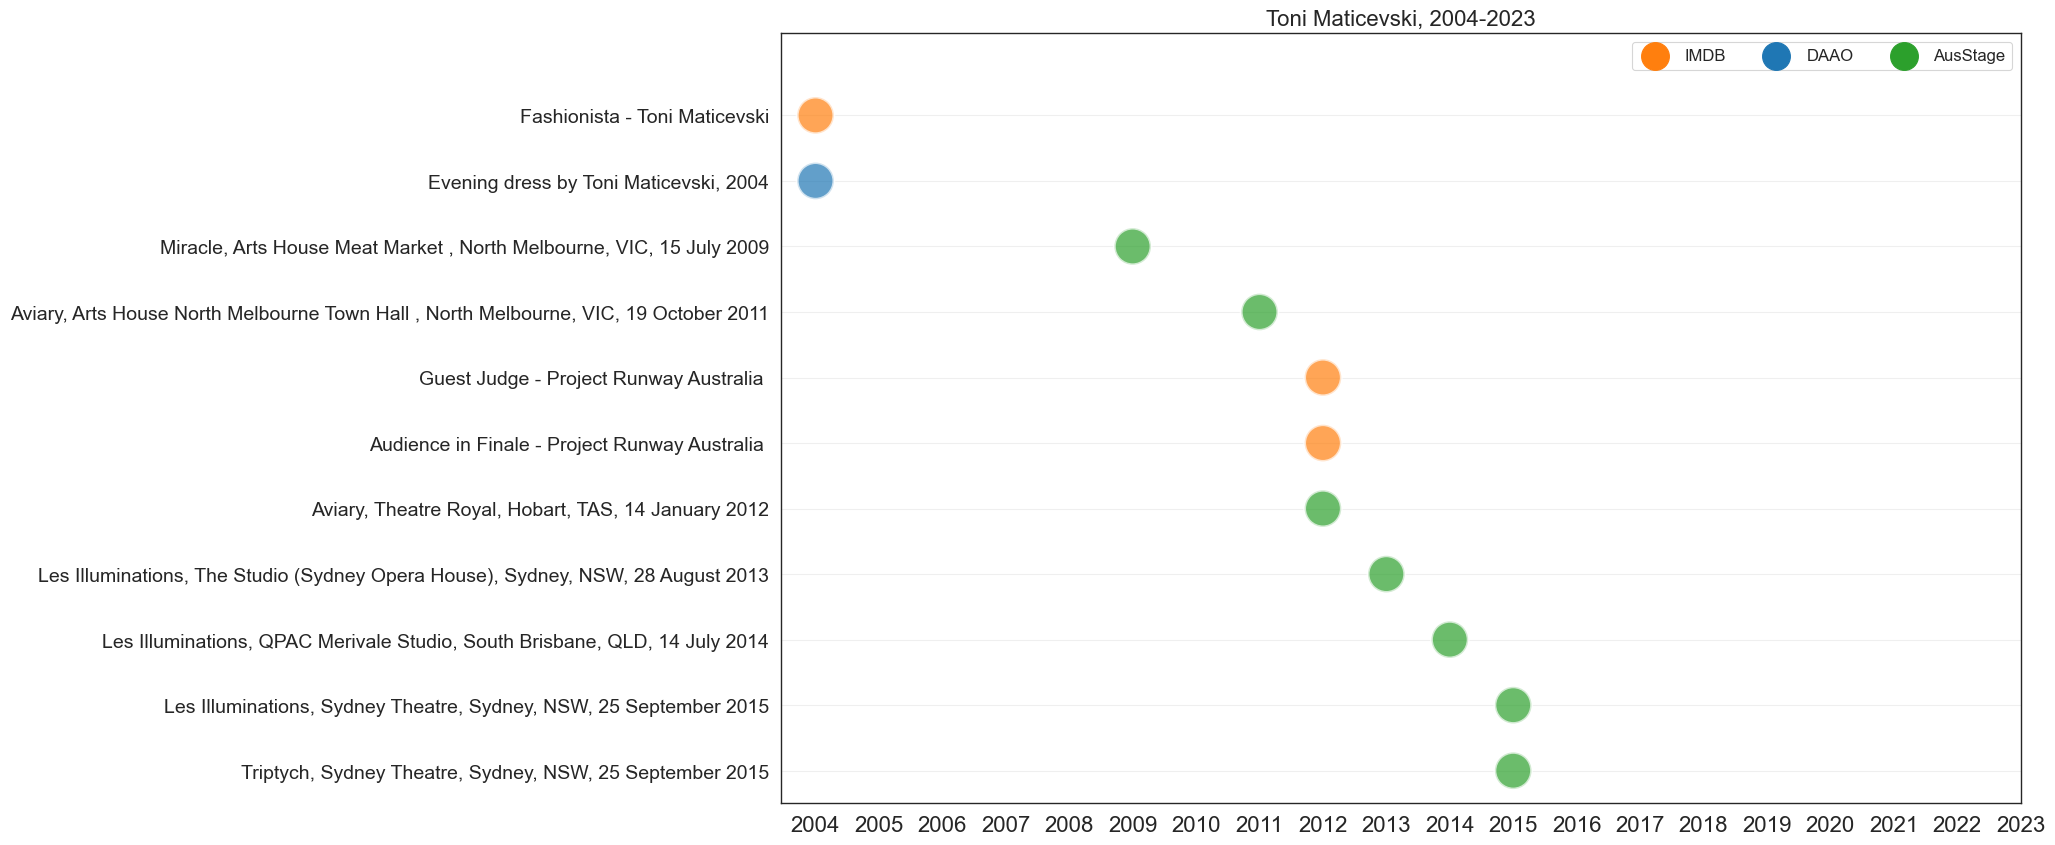

In [4]:
fig, ax = plt.subplots(figsize=(16,10))
sns.scatterplot(data=george_df[george_df['Start'] >= 2004].sort_values('Start'),
x='Start', y='Event', 
hue='Dataset', ax=ax, s=700, alpha=0.7, palette=['tab:orange','tab:blue','tab:green'])

plt.legend(loc='lower left', fontsize=14, ncol=2, facecolor='white')
# for i in range(6): plt.gca().get_legend().legendHandles[i]._sizes = [200]

# make y-axis labels larger
plt.yticks(fontsize=14); plt.xticks(fontsize=16)
plt.ylabel(''); plt.xlabel('')

# add y-axis grid
plt.grid(axis='y', alpha=0.3)

# add a title
plt.title('Toni Maticevski, 2004-2023' , fontsize=16)

# # add annotation top right of plot to denote the vertical lines
# plt.annotate('| = annual break', xy=(2006.5, -.5), fontsize=12, alpha=0.5)

# move legend to specific location
plt.legend(loc='upper right', fontsize=12, ncol=3, facecolor='white')
for i in range(3): plt.gca().get_legend().legendHandles[i]._sizes = [400]

# show each year on x-acis
plt.xticks(np.arange(2004, 2024, 1))

# increase y-axis limits to make room for the title
plt.ylim(10.5, -1.25)

plt.show()